
=== Testing LDA_BERT with gamma=1 ===
=== LDA_BERT: Building dictionary, corpus, training LDA, BERT, etc. ===
[BERT] Generating vectors...
[KMeans] Fitting on LDA_BERT vectors...
=== LDA_BERT Fit Complete ===


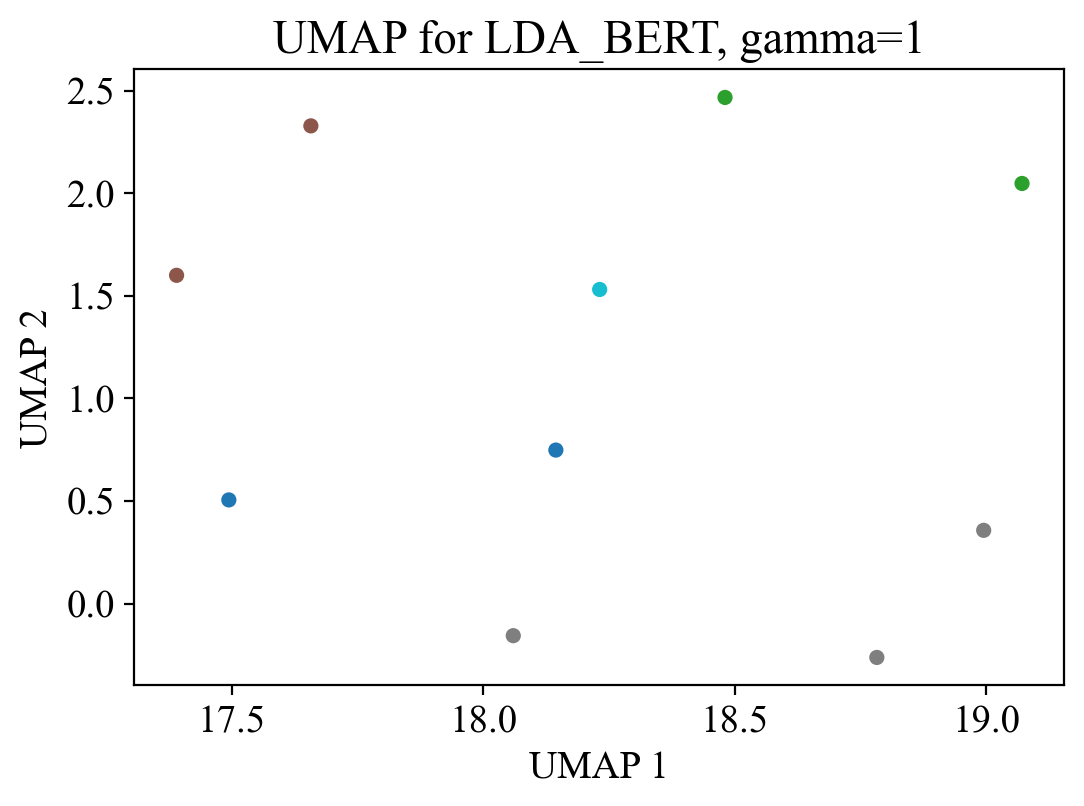


=== Testing LDA_BERT with gamma=5 ===
=== LDA_BERT: Building dictionary, corpus, training LDA, BERT, etc. ===
[BERT] Generating vectors...
[KMeans] Fitting on LDA_BERT vectors...
=== LDA_BERT Fit Complete ===


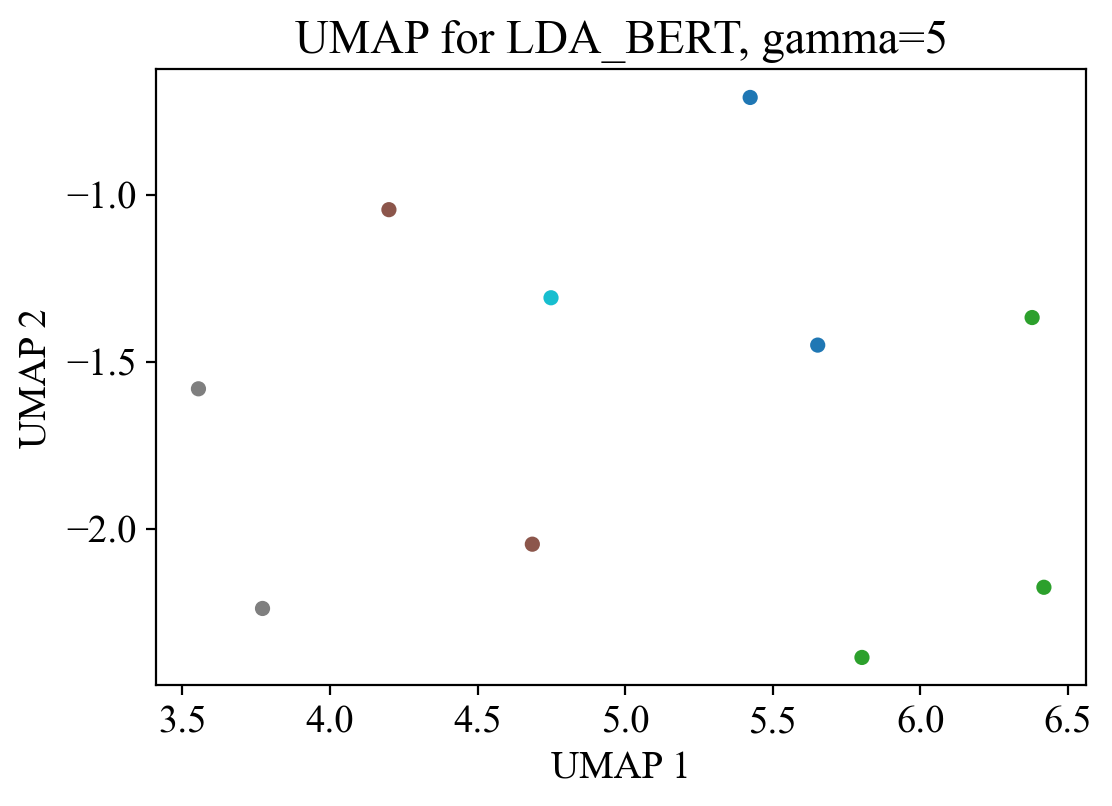


=== Testing LDA_BERT with gamma=10 ===
=== LDA_BERT: Building dictionary, corpus, training LDA, BERT, etc. ===
[BERT] Generating vectors...
[KMeans] Fitting on LDA_BERT vectors...
=== LDA_BERT Fit Complete ===


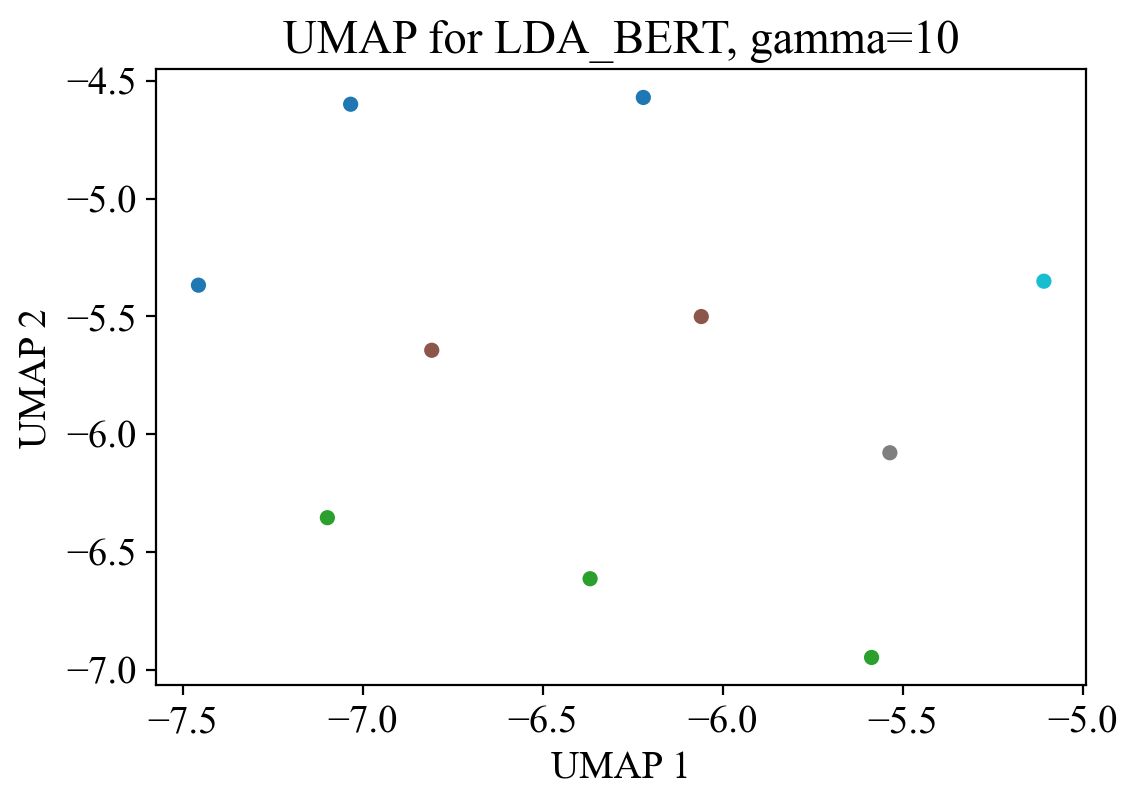


=== Testing LDA_BERT with gamma=15 ===
=== LDA_BERT: Building dictionary, corpus, training LDA, BERT, etc. ===
[BERT] Generating vectors...
[KMeans] Fitting on LDA_BERT vectors...
=== LDA_BERT Fit Complete ===


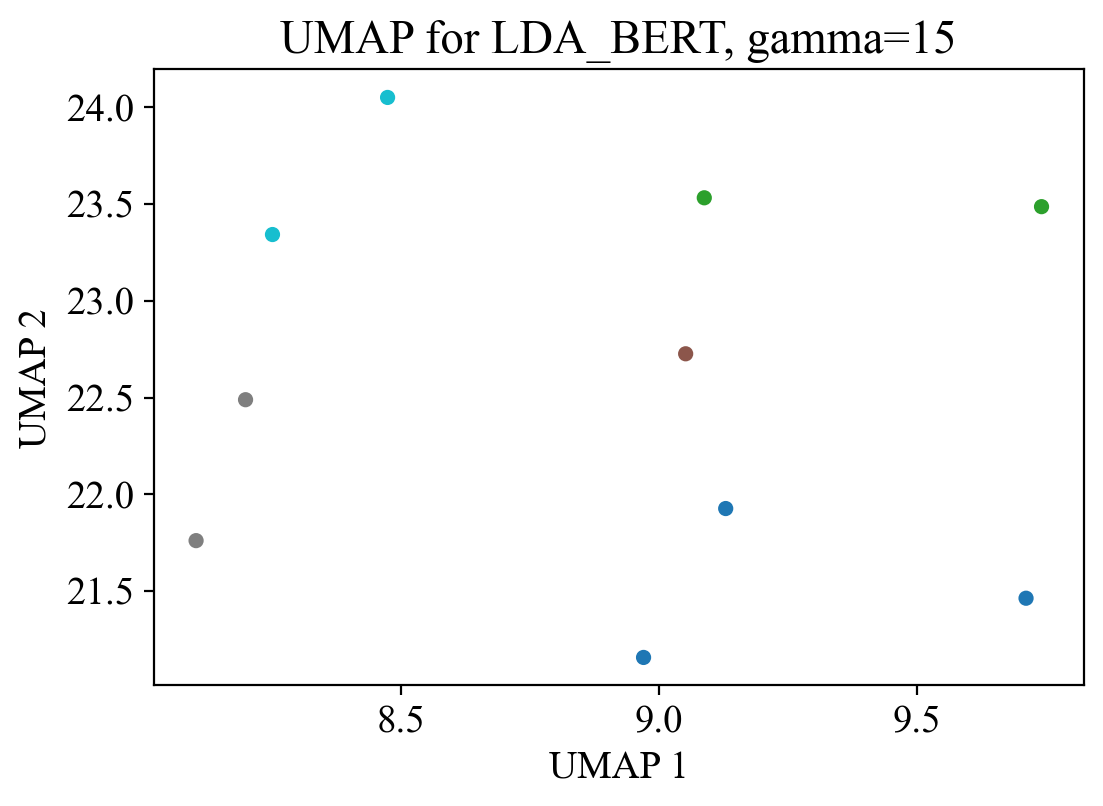


=== Testing LDA_BERT with gamma=20 ===
=== LDA_BERT: Building dictionary, corpus, training LDA, BERT, etc. ===
[BERT] Generating vectors...
[KMeans] Fitting on LDA_BERT vectors...
=== LDA_BERT Fit Complete ===


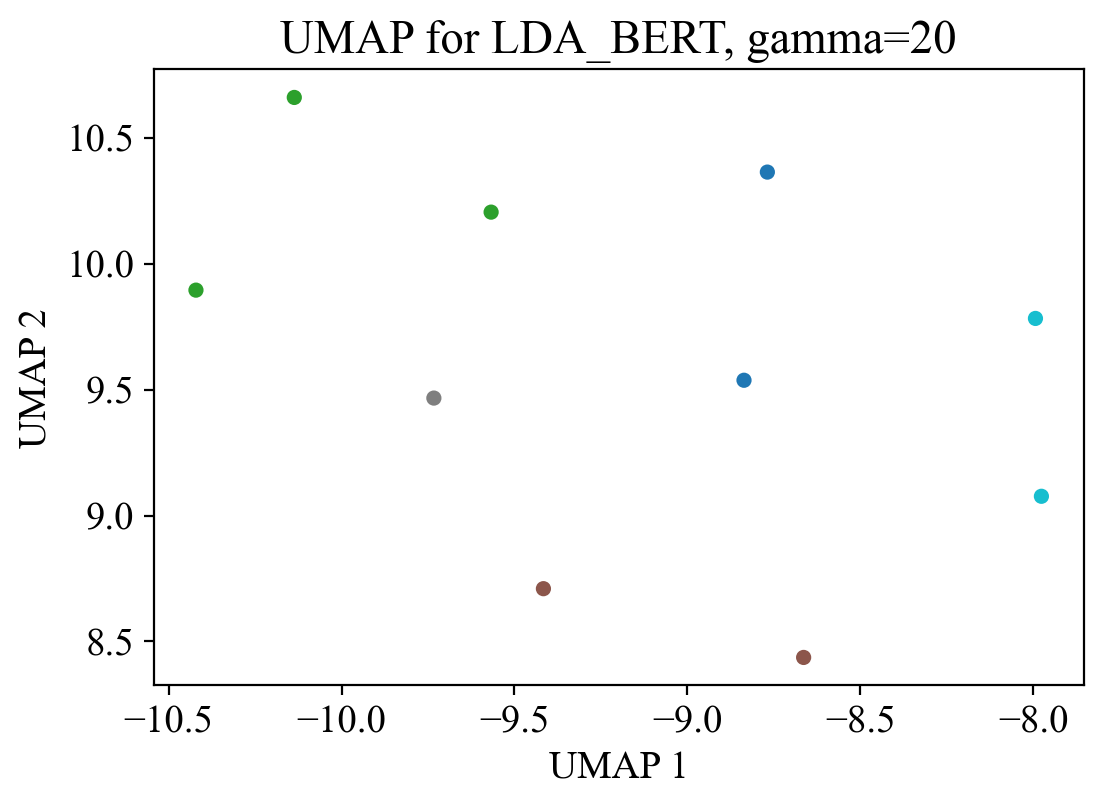

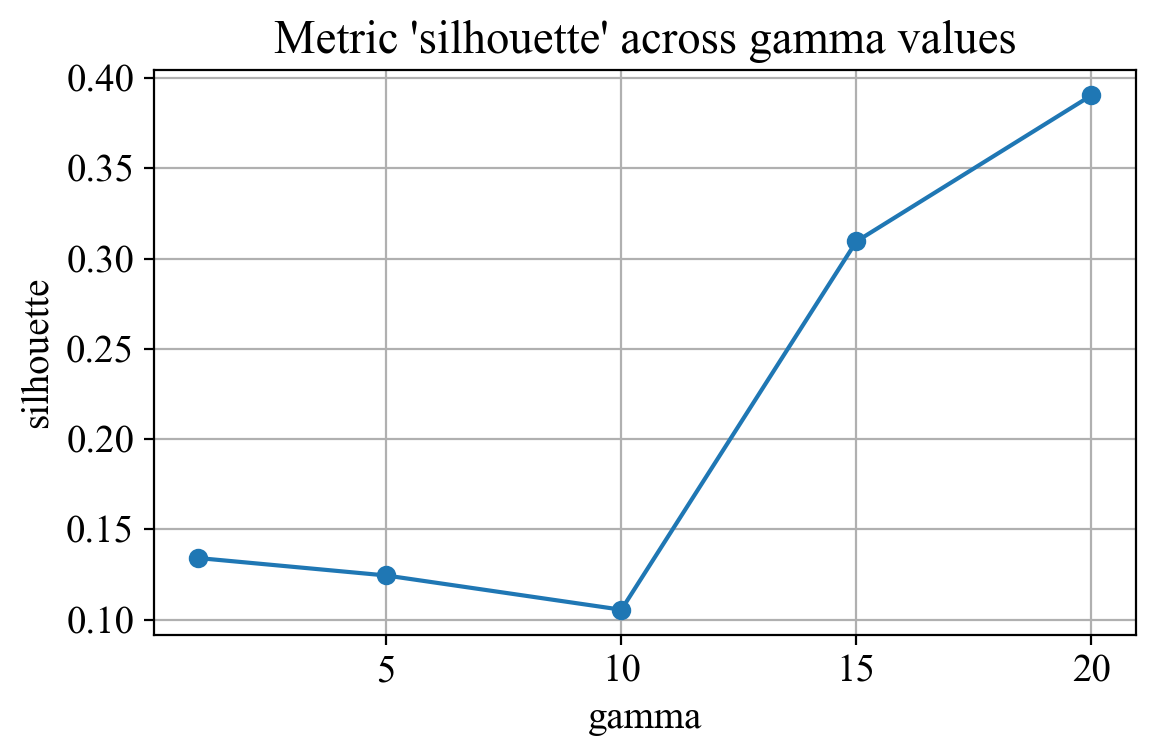

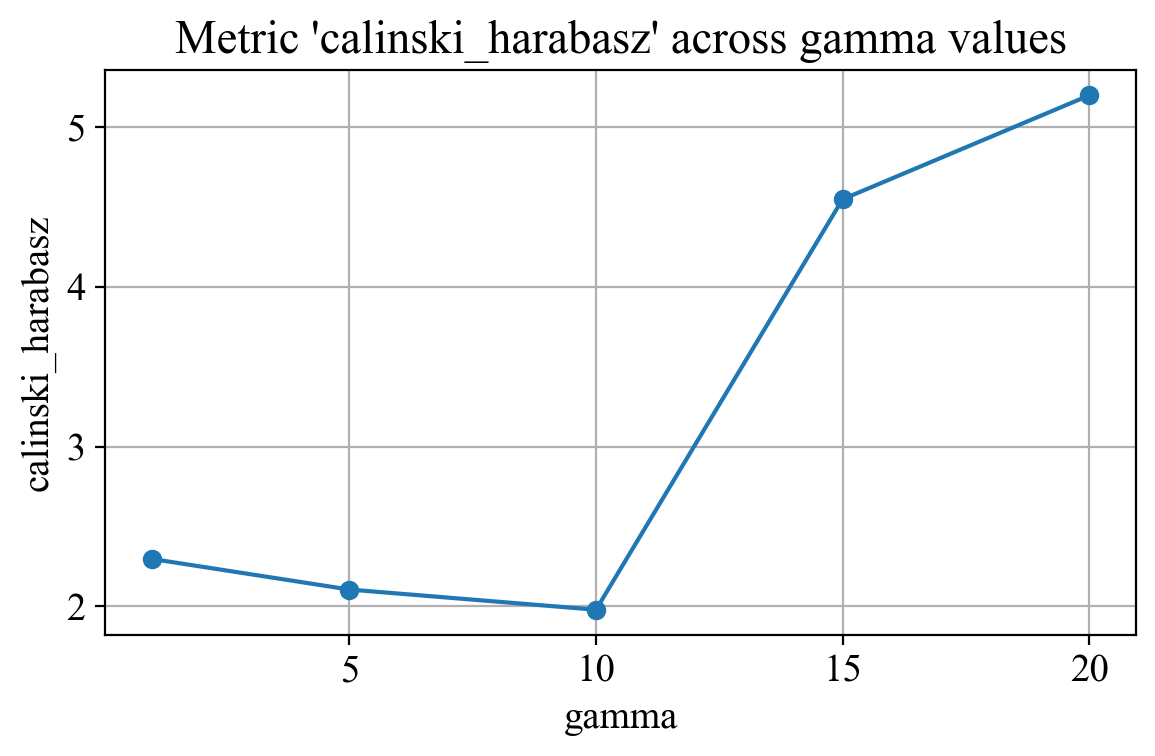

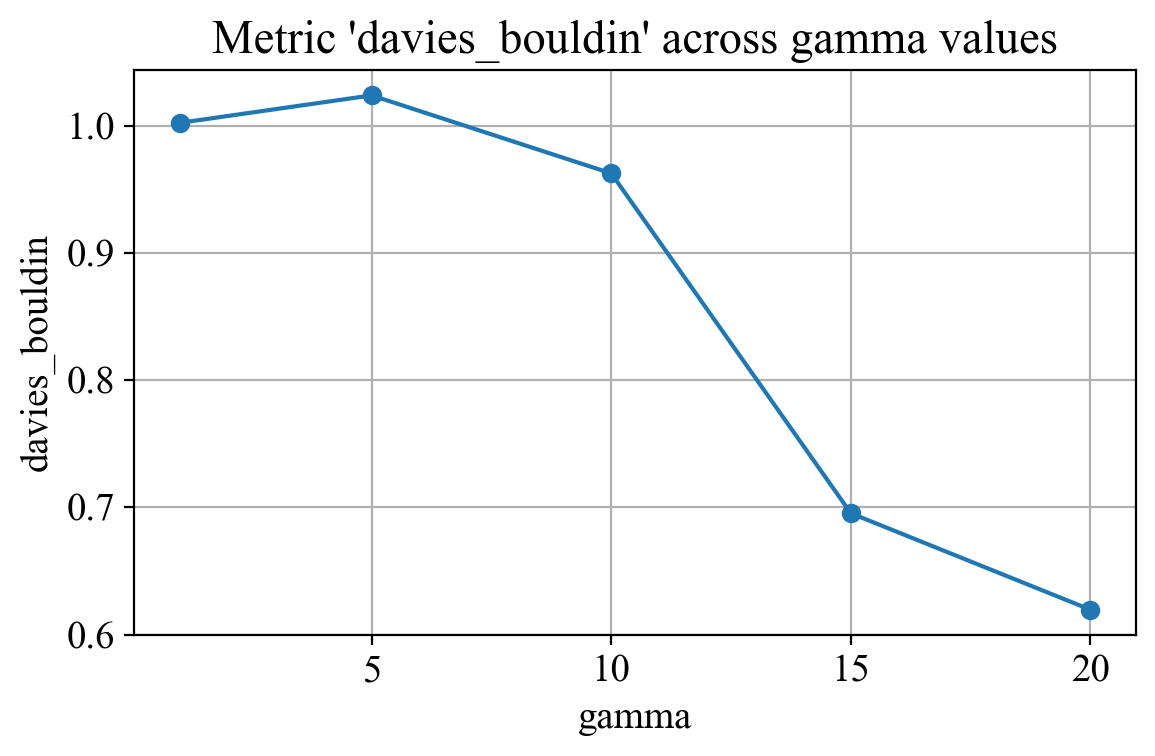

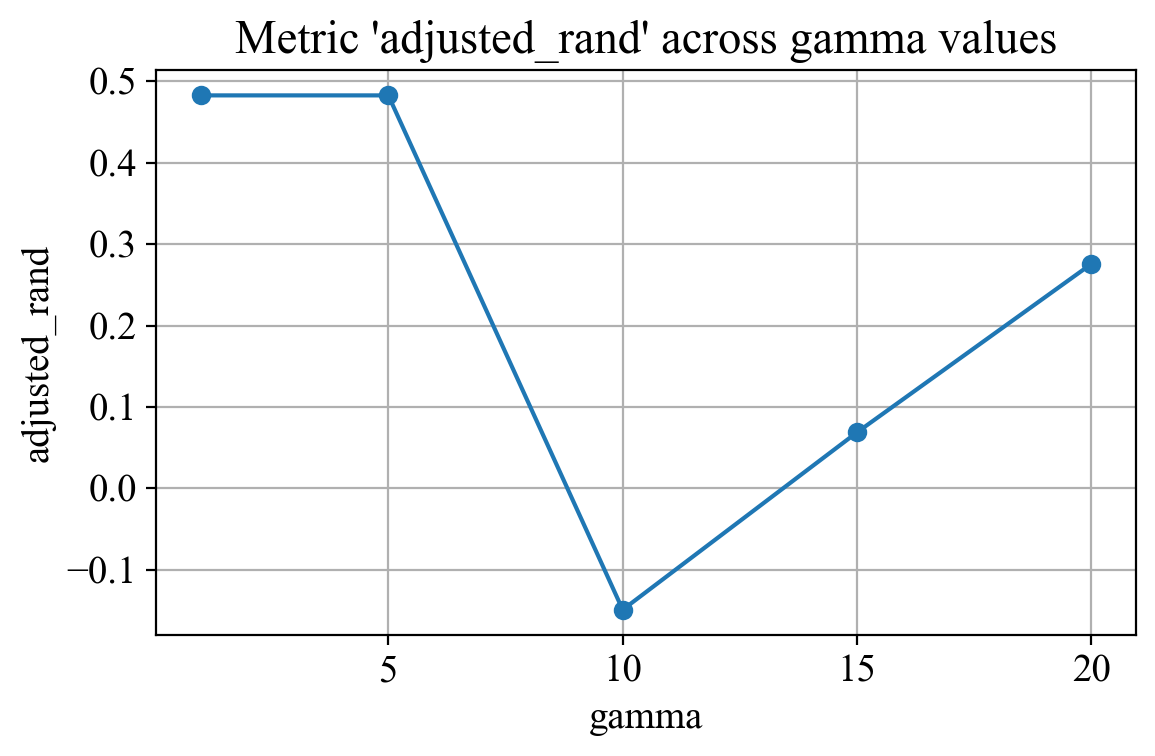

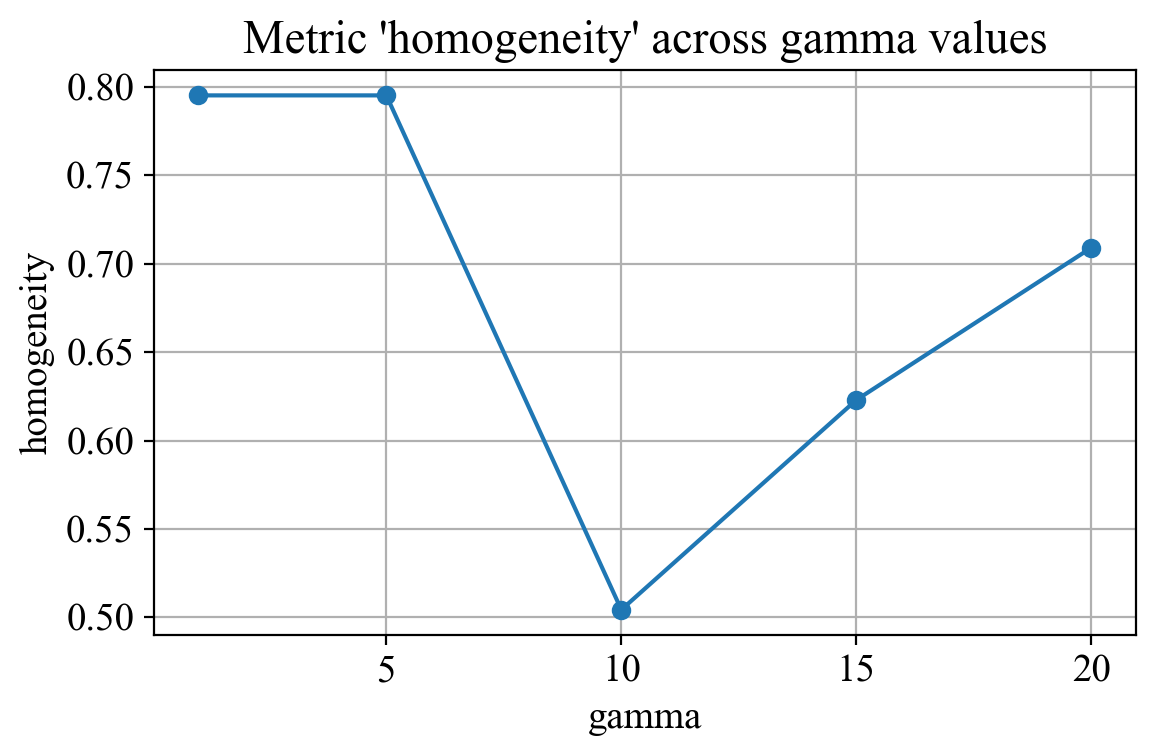

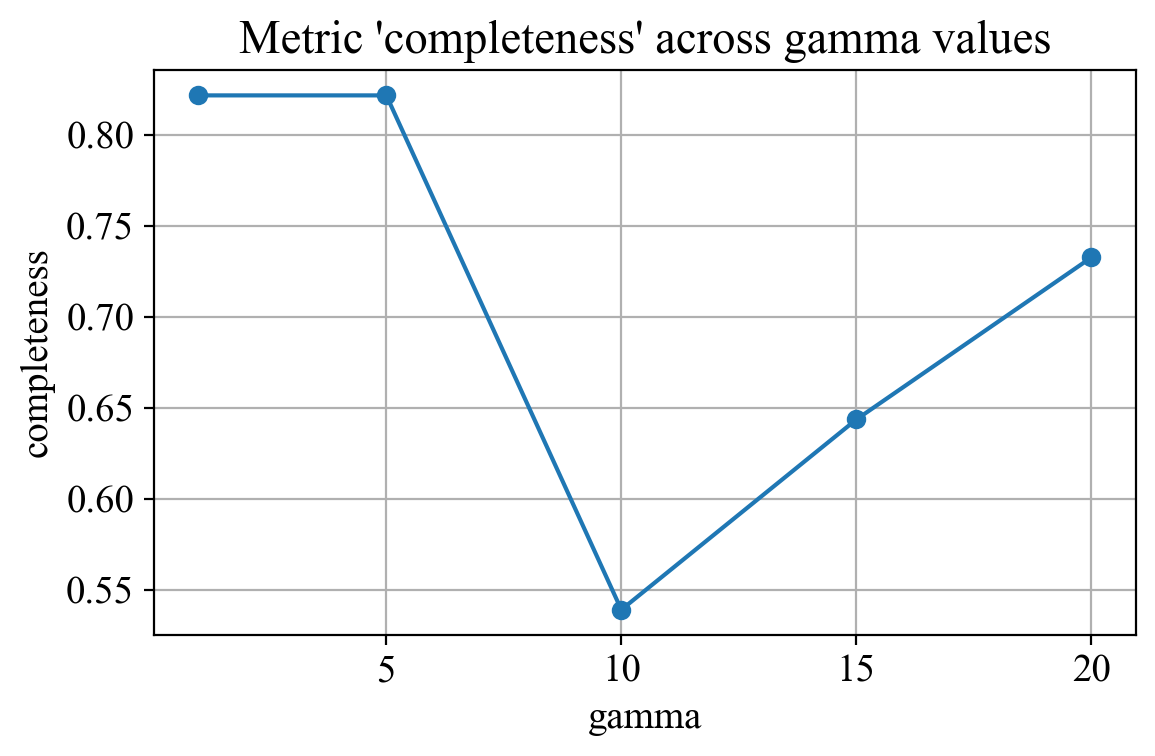

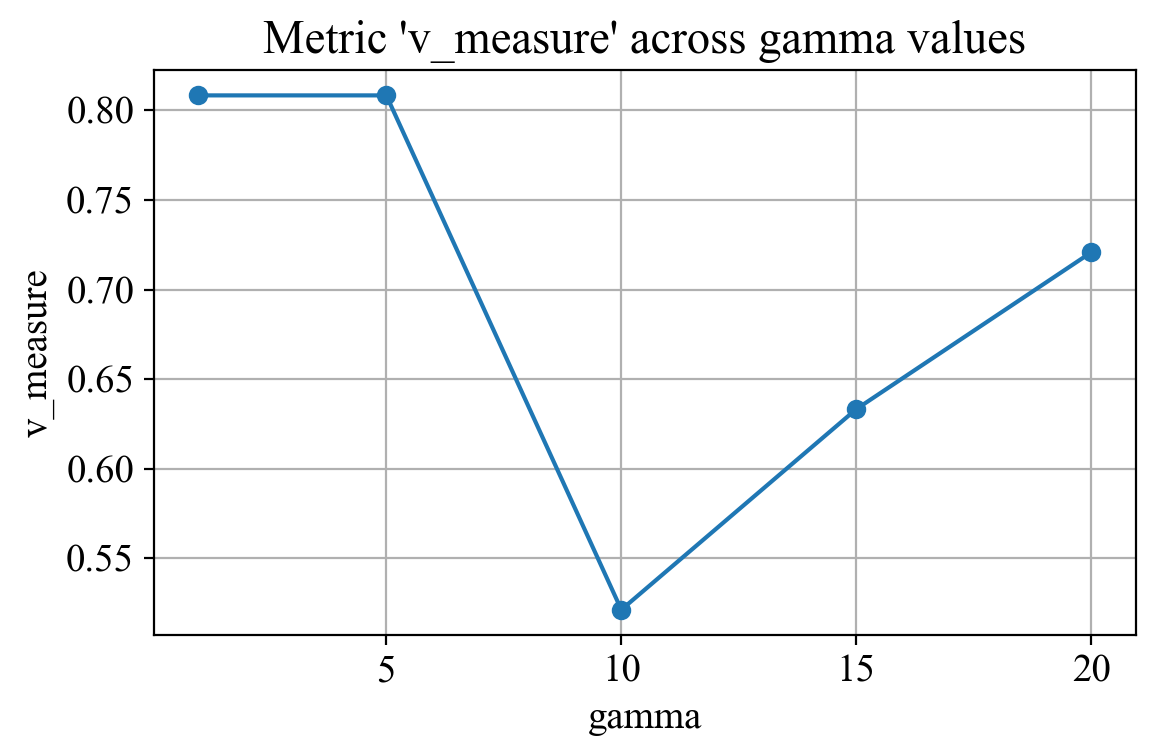


=== Final results for each gamma ===

Gamma=1:
  silhouette: 0.1341
  calinski_harabasz: 2.2964
  davies_bouldin: 1.0025
  adjusted_rand: 0.4828
  homogeneity: 0.7952
  completeness: 0.8219
  v_measure: 0.8084

Gamma=5:
  silhouette: 0.1245
  calinski_harabasz: 2.1051
  davies_bouldin: 1.0241
  adjusted_rand: 0.4828
  homogeneity: 0.7952
  completeness: 0.8219
  v_measure: 0.8084

Gamma=10:
  silhouette: 0.1055
  calinski_harabasz: 1.9788
  davies_bouldin: 0.9627
  adjusted_rand: -0.1489
  homogeneity: 0.5043
  completeness: 0.5394
  v_measure: 0.5212

Gamma=15:
  silhouette: 0.3095
  calinski_harabasz: 4.5490
  davies_bouldin: 0.6954
  adjusted_rand: 0.0690
  homogeneity: 0.6229
  completeness: 0.6439
  v_measure: 0.6332

Gamma=20:
  silhouette: 0.3904
  calinski_harabasz: 5.1997
  davies_bouldin: 0.6196
  adjusted_rand: 0.2759
  homogeneity: 0.7091
  completeness: 0.7329
  v_measure: 0.7208


In [27]:
############################################
# 1) Imports
############################################
import re
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14

from sentence_transformers import SentenceTransformer
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
)

from umap import UMAP


############################################
# 2) Toy dataset
############################################
toy_data = [
    ("tech", "A new smartphone was launched today by a major company."),
    ("tech", "Innovations in AI and robotics are transforming industries."),
    ("business", "Stock markets soared after the announcement of new trade deals."),
    ("business", "The quarterly earnings report beat analyst expectations."),
    ("sport", "The local team won the national championship in a thrilling match."),
    ("sport", "An international sports event will be hosted in the city next year."),
    ("entertainment", "The new blockbuster movie set box office records this weekend."),
    ("entertainment", "A famous singer released a chart-topping album."),
    ("politics", "The president outlined new policy measures in a press conference."),
    ("politics", "Parliament debated the proposed changes to the election law."),
]

# Extract categories and sentences
categories = [row[0] for row in toy_data]
sentences = [row[1] for row in toy_data]

# Minimal tokenization for LDA
def simple_tokenize(text):
    # Lowercase + keep only letters/spaces
    text = re.sub(r"[^a-zA-Z\s]", " ", text.lower())
    # Split by whitespace
    words = text.split()
    return words

token_lists = [simple_tokenize(s) for s in sentences]


############################################
# 3) Evaluate function (clustering-like metrics)
############################################
def evaluate_clustering(X, labels, ground_truth=None):
    """
    Compute cluster-like metrics (internal + external).
    X can be dense or sparse. If sparse, we convert to dense for silhouette, etc.
    """
    if hasattr(X, 'toarray'):
        X_dense = X.toarray()
    else:
        X_dense = X
    
    metrics_dict = {}
    # Internal metrics
    metrics_dict['silhouette'] = silhouette_score(X_dense, labels)
    metrics_dict['calinski_harabasz'] = calinski_harabasz_score(X_dense, labels)
    metrics_dict['davies_bouldin'] = davies_bouldin_score(X_dense, labels)

    # External metrics (if we have ground truth)
    if ground_truth is not None:
        metrics_dict['adjusted_rand'] = adjusted_rand_score(ground_truth, labels)
        metrics_dict['homogeneity'] = homogeneity_score(ground_truth, labels)
        metrics_dict['completeness'] = completeness_score(ground_truth, labels)
        metrics_dict['v_measure'] = v_measure_score(ground_truth, labels)

    return metrics_dict


############################################
# 4) Minimal Autoencoder class (if needed)
############################################
# We'll define a dummy autoencoder that doesn't train, 
# just passes the data through. This is to keep code simpler.
# If you want a real autoencoder, you can implement it similarly 
# to your existing code.

class DummyAutoencoder:
    def fit(self, X):
        pass  # no-op

    def encoder(self, X):
        # We'll treat this as if it returns X unchanged
        return X


############################################
# 5) Topic_Model class (focusing on LDA_BERT)
############################################
class Topic_Model:
    def __init__(self, k=5, method='LDA_BERT'):
        """
        This minimal version focuses specifically on the 'LDA_BERT' method.
        We do not implement TFIDF, BERT-only, etc. for brevity.
        """
        self.k = k
        self.method = method
        self.gamma = 20  
        self.dictionary = None
        self.corpus = None
        self.ldamodel = None
        self.cluster_model = None
        self.vec = {}
        self.AE = None  # We'll store an autoencoder if needed
    
    def fit(self, sentences, token_lists):
        """
        For LDA_BERT:
          1) Build dictionary & corpus.
          2) Train LDA (if not trained).
          3) Encode with BERT.
          4) Scale LDA vectors by gamma, then concat with BERT vectors.
          5) Optionally pass through an autoencoder or dummy pass.
          6) KMeans clustering.
        """
        print("=== LDA_BERT: Building dictionary, corpus, training LDA, BERT, etc. ===")
        # 1) Dictionary & corpus
        self.dictionary = corpora.Dictionary(token_lists)
        self.corpus = [self.dictionary.doc2bow(tokens) for tokens in token_lists]

        # 2) LDA
        # We'll do a small pass (2 passes) just for demo
        self.ldamodel = LdaModel(self.corpus, num_topics=self.k, id2word=self.dictionary, passes=2)
        
        # 3) BERT
        print("[BERT] Generating vectors...")
        model_bert = SentenceTransformer('bert-base-nli-mean-tokens')
        vec_bert = model_bert.encode(sentences, show_progress_bar=False)
        vec_bert = np.array(vec_bert)

        # 4) LDA vectors scaled by gamma
        vec_lda = np.zeros((len(self.corpus), self.k))
        for i, bow in enumerate(self.corpus):
            topics_probs = self.ldamodel.get_document_topics(bow)
            for (topic_id, prob) in topics_probs:
                vec_lda[i, topic_id] = prob

        vec_ldabert_full = np.c_[vec_lda * self.gamma, vec_bert]  # horizontally concat

        # 5) Autoencoder or dummy pass
        # We'll do a dummy pass to keep code minimal
        if not self.AE:
            self.AE = DummyAutoencoder()
        self.AE.fit(vec_ldabert_full)  # no-op
        # We'll pretend 'encoder' returns the same dimensional data
        vec_ldabert_latent = self.AE.encoder(vec_ldabert_full)

        # Store the final vectors
        self.vec['LDA_BERT'] = vec_ldabert_latent

        # 6) KMeans
        print("[KMeans] Fitting on LDA_BERT vectors...")
        self.cluster_model = KMeans(n_clusters=self.k, random_state=42)
        self.cluster_model.fit(vec_ldabert_latent)
        print("=== LDA_BERT Fit Complete ===")


############################################
# 6) compare_gamma_values_LDABERT function
############################################
def compare_gamma_values_LDABERT(
    gamma_values, 
    sentences, 
    token_lists, 
    categories, 
    evaluate_func,
    reducer=None
):
    """
    Compare different gamma values for LDA_BERT approach.
    Plots line charts showing how each metric changes across gamma values.
    """
    results = {}
    for g in gamma_values:
        print(f"\n=== Testing LDA_BERT with gamma={g} ===")
        # Create an LDA_BERT model
        model_ldabert = Topic_Model(k=5, method='LDA_BERT')
        # Override the default gamma
        model_ldabert.gamma = g

        # Fit the model
        model_ldabert.fit(sentences, token_lists)

        # Extract vectors and cluster labels
        X_ldabert = model_ldabert.vec['LDA_BERT']
        labels_ldabert = model_ldabert.cluster_model.labels_

        # Evaluate
        metrics_ldabert = evaluate_func(X_ldabert, labels_ldabert, ground_truth=categories)
        results[g] = metrics_ldabert

        # Optionally visualize
        if reducer:
            emb_ldabert = reducer.fit_transform(X_ldabert)
            plt.figure(figsize=(6, 4), dpi=200)
            plt.scatter(emb_ldabert[:, 0], emb_ldabert[:, 1], c=labels_ldabert, cmap='tab10', s=20)
            plt.title(f"UMAP for LDA_BERT, gamma={g}")
            plt.xlabel("UMAP 1")
            plt.ylabel("UMAP 2")
            plt.show()

    # Plot each metric across gamma
    # Extract the list of metrics from one result set (assuming they're the same across all)
    all_metrics = list(next(iter(results.values())).keys())
    gamma_list = list(results.keys())

    for m in all_metrics:
        # Prepare data
        y_vals = [results[g].get(m, np.nan) for g in gamma_list]

        plt.figure(figsize=(6, 4), dpi=200)
        plt.plot(gamma_list, y_vals, marker='o')
        plt.title(f"Metric '{m}' across gamma values")
        plt.xlabel("gamma")
        plt.ylabel(m)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return results


############################################
# 7) Run the comparison
############################################
if __name__ == "__main__":
    # If categories are textual labels (e.g. 'tech', 'sport'), 
    # let's convert them to numeric so external metrics make sense:
    unique_labels = list(set(categories))
    label_to_id = {label: idx for idx, label in enumerate(unique_labels)}
    numeric_cats = [label_to_id[c] for c in categories]

    # We can create a UMAP reducer if we want to visualize each gamma
    reducer = UMAP(random_state=42)

    gamma_vals = [1, 5, 10, 15, 20]
    all_results = compare_gamma_values_LDABERT(
        gamma_vals, 
        sentences, 
        token_lists, 
        numeric_cats, 
        evaluate_clustering,
        reducer=reducer
    )

    # Print out final results
    print("\n=== Final results for each gamma ===")
    for g, metrics_dict in all_results.items():
        print(f"\nGamma={g}:")
        for k, v in metrics_dict.items():
            print(f"  {k}: {v:.4f}")


In [28]:
# ============================== [CELL 1] ==============================
# 1) Import necessary libraries, disable warnings, set up environment

import os
import re
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Disable huggingface/tokenizers parallel warnings
os.environ["TOKENIZERS_PARALLELISM"] = "true"

# Matplotlib for plotting
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14

from matplotlib.lines import Line2D
from typing import Counter
from wordcloud import WordCloud
from datetime import datetime
import pickle

# NLTK
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Stop-words
from stop_words import get_stop_words

# Language detection
from language_detector import detect_language

# SymSpell for typo correction
import pkg_resources
from symspellpy import SymSpell, Verbosity

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Gensim (LDA)
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel

# K-Means
from sklearn.cluster import KMeans

# Keras (for Autoencoder)
import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

# UMAP
import umap

# Classification Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    adjusted_rand_score,
    homogeneity_score,
    completeness_score,
    v_measure_score
)

print("All necessary libraries have been imported.")


All necessary libraries have been imported.


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/talgatazykanov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/talgatazykanov/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [29]:
# ============================== [CELL 2] ==============================
# 2) Preprocessing functions and SymSpell initialization

# Initialize SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=3, prefix_length=7)
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
if not sym_spell.word_count:
    sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

def f_base(s: str) -> str:
    """
    Basic text normalization.
    """
    # 1. 'aA' -> 'a. A'
    s = re.sub(r'([a-z])([A-Z])', r'\1\. \2', s)
    # 2. lowercase
    s = s.lower()
    # 3. remove HTML entities
    s = re.sub(r'&gt|&lt', ' ', s)
    # 4. repeating letters (>2)
    s = re.sub(r'([a-z])\1{2,}', r'\1', s)
    # 5. repeating non-letters
    s = re.sub(r'([\W+])\1{1,}', r'\1', s)
    # 6. '*' -> '. '
    s = re.sub(r'\*|\W\*|\*\W', '. ', s)
    # 7. content inside parentheses
    s = re.sub(r'\(.*?\)', '. ', s)
    # 8. '???...' -> '.'
    s = re.sub(r'\W+?\.', '.', s)
    # 9. ".A" -> ". A"
    s = re.sub(r'(\.|\?|!)(\w)', r'\1 \2', s)
    # 10. remove " ing "
    s = re.sub(r' ing ', ' ', s)
    # 11. remove "product received for free"
    s = re.sub(r'product received for free[.| ]', ' ', s)
    # 12. repeated phrases
    s = re.sub(r'(.{2,}?)\1{1,}', r'\1', s)

    return s.strip()

def f_lan(s: str) -> bool:
    """
    Verify that the text language is English/French.
    """
    return detect_language(s) in {'English', 'French'}

def f_punct(w_list):
    """
    Remove punctuation and digits.
    """
    return [word for word in w_list if word.isalpha()]

def f_noun(w_list):
    """
    Keep only nouns (NN).
    """
    return [word for (word, pos) in nltk.pos_tag(w_list) if pos[:2] == 'NN']

def f_typo(w_list):
    """
    Fix typos using SymSpell.
    """
    fixed_words = []
    for word in w_list:
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=3)
        if suggestions:
            fixed_words.append(suggestions[0].term)
    return fixed_words

p_stemmer = PorterStemmer()

def f_stem(w_list):
    """
    Stemming words.
    """
    return [p_stemmer.stem(word) for word in w_list]

en_stop = get_stop_words('en')
en_stop += ['game', 'play', 'player', 'time']

def f_stopw(w_list):
    """
    Remove stopwords.
    """
    return [word for word in w_list if word not in en_stop]

def preprocess_sent(rw: str) -> str:
    """
    Document-level preprocessing.
    """
    s = f_base(rw)
    if not f_lan(s):
        return None
    return s

def preprocess_word(s: str):
    """
    Token-level preprocessing pipeline:
      1) tokenize
      2) remove punctuation/digits
      3) keep nouns
      4) fix typos
      5) stem
      6) remove stopwords
    """
    if not s:
        return None
    w_list = word_tokenize(s)
    w_list = f_punct(w_list)
    w_list = f_noun(w_list)
    w_list = f_typo(w_list)
    w_list = f_stem(w_list)
    w_list = f_stopw(w_list)
    return w_list

print("Preprocessing functions are ready.")


Preprocessing functions are ready.


In [30]:
# ============================== [CELL 3] ==============================
# 3) Autoencoder class (for LDA+BERT scenario)

class Autoencoder:
    """
    A simple one-layer Autoencoder (latent_dim is the hidden layer size).
    """
    def __init__(self, latent_dim=32, activation='relu', epochs=200, batch_size=128):
        self.latent_dim = latent_dim
        self.activation = activation
        self.epochs = epochs
        self.batch_size = batch_size
        self.autoencoder = None
        self.encoder = None
        self.decoder = None
        self.his = None

    def _compile(self, input_dim):
        """
        Build and compile the autoencoder model.
        """
        input_vec = Input(shape=(input_dim,))
        encoded = Dense(self.latent_dim, activation=self.activation)(input_vec)
        decoded = Dense(input_dim, activation=self.activation)(encoded)

        self.autoencoder = Model(input_vec, decoded)
        self.encoder = Model(input_vec, encoded)

        # Build decoder
        encoded_input = Input(shape=(self.latent_dim,))
        decoder_layer = self.autoencoder.layers[-1]
        self.decoder = Model(encoded_input, decoder_layer(encoded_input))

        self.autoencoder.compile(optimizer='adam', loss=keras.losses.mean_squared_error)

    def fit(self, X):
        """
        Train the autoencoder.
        """
        if not self.autoencoder:
            self._compile(X.shape[1])

        X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
        self.his = self.autoencoder.fit(
            X_train, X_train,
            epochs=self.epochs,
            batch_size=self.batch_size,
            shuffle=True,
            validation_data=(X_test, X_test),
            verbose=0
        )

        # Plot training loss
        plt.figure(figsize=(6,4), dpi=350)
        plt.plot(self.his.history['loss'], label='Train Loss')
        plt.plot(self.his.history['val_loss'], label='Validation Loss')
        plt.title('Autoencoder Loss by Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

print("Autoencoder class has been defined.")


Autoencoder class has been defined.


In [31]:
# ============================== [CELL 4] ==============================
# 4) Auxiliary functions: get_vec_lda, evaluate_clustering, etc.

def get_vec_lda(lda_model, corpus, k):
    """
    Get LDA vectors of shape (n_docs x k).
    """
    n_doc = len(corpus)
    vec_lda = np.zeros((n_doc, k))
    for i in range(n_doc):
        topics_probs = lda_model.get_document_topics(corpus[i])
        for topic, prob in topics_probs:
            vec_lda[i, topic] = prob
    return vec_lda

def evaluate_clustering(X, labels, ground_truth=None):
    """
    Compute clustering metrics:
      - silhouette
      - calinski_harabasz
      - davies_bouldin
      - adjusted_rand, homogeneity, completeness, v_measure (if ground_truth)
    """
    if hasattr(X, 'toarray'):
        X_dense = X.toarray()
    else:
        X_dense = X

    metrics_dict = {}
    # Internal metrics (treat 'labels' as clusters)
    metrics_dict['silhouette'] = silhouette_score(X_dense, labels)
    metrics_dict['calinski_harabasz'] = calinski_harabasz_score(X_dense, labels)
    metrics_dict['davies_bouldin'] = davies_bouldin_score(X_dense, labels)

    # External metrics (if ground_truth provided)
    if ground_truth is not None:
        metrics_dict['adjusted_rand'] = adjusted_rand_score(ground_truth, labels)
        metrics_dict['homogeneity'] = homogeneity_score(ground_truth, labels)
        metrics_dict['completeness'] = completeness_score(ground_truth, labels)
        metrics_dict['v_measure'] = v_measure_score(ground_truth, labels)
    return metrics_dict

print("Auxiliary functions (get_vec_lda, evaluate_clustering) are ready.")


Auxiliary functions (get_vec_lda, evaluate_clustering) are ready.


In [32]:
# ============================== [CELL 5] ==============================
# 5) Topic_Model class: supports TFIDF, BERT, LDA, LDA_BERT

from sentence_transformers import SentenceTransformer

class Topic_Model:
    def __init__(self, k=5, method='TFIDF'):
        """
        k: number of clusters/topics
        method: {TFIDF, BERT, LDA, LDA_BERT}
        """
        if method not in {'TFIDF', 'BERT', 'LDA', 'LDA_BERT'}:
            raise ValueError("method must be TFIDF, BERT, LDA or LDA_BERT")

        self.k = k
        self.dictionary = None
        self.corpus = None
        self.cluster_model = None
        self.ldamodel = None
        self.vec = {}
        self.gamma = 20  # Scaling factor for LDA part in LDA_BERT
        self.method = method
        self.AE = None  # Autoencoder for LDA_BERT

        # Storing topic labels for future usage
        self.topic_labels = {
            0: 'tech',
            1: 'business',
            2: 'sport',
            3: 'entertainment',
            4: 'politics'
        }

        self.id = f"{method}_{datetime.now().strftime('%Y_%m_%d_%H_%M_%S')}"

    def vectorize(self, sentences, token_lists):
        """
        Generate vector representations depending on the method.
        """
        # Build dictionary if needed
        if not self.dictionary:
            self.dictionary = corpora.Dictionary(token_lists)
            self.corpus = [self.dictionary.doc2bow(toks) for toks in token_lists]

        if self.method == 'TFIDF':
            print("[TFIDF] Generating vector representations...")
            tfidf = TfidfVectorizer()
            vec_tfidf = tfidf.fit_transform(sentences)
            print("[TFIDF] Done!")
            return vec_tfidf

        elif self.method == 'LDA':
            print("[LDA] Generating vector representations...")
            if not self.ldamodel:
                self.ldamodel = gensim.models.ldamodel.LdaModel(
                    self.corpus,
                    num_topics=self.k,
                    id2word=self.dictionary,
                    passes=20
                )
            vec_lda = get_vec_lda(self.ldamodel, self.corpus, self.k)
            print("[LDA] Done!")
            return vec_lda

        elif self.method == 'BERT':
            print("[BERT] Generating vector representations...")
            model_bert = SentenceTransformer('bert-base-nli-max-tokens')
            vec_bert = model_bert.encode(sentences, show_progress_bar=True)
            vec_bert = np.array(vec_bert)
            print("[BERT] Done!")
            return vec_bert

        elif self.method == 'LDA_BERT':
            print("[LDA_BERT] Generating vector representations...")
            # LDA part
            if not self.ldamodel:
                self.ldamodel = gensim.models.ldamodel.LdaModel(
                    self.corpus,
                    num_topics=self.k,
                    id2word=self.dictionary,
                    passes=20
                )
            vec_lda = get_vec_lda(self.ldamodel, self.corpus, self.k)

            # BERT part
            model_bert = SentenceTransformer('bert-base-nli-max-tokens')
            vec_bert = model_bert.encode(sentences, show_progress_bar=True)
            vec_bert = np.array(vec_bert)

            # Combine LDA + BERT
            vec_ldabert_full = np.c_[vec_lda * self.gamma, vec_bert]
            self.vec['LDA_BERT_FULL'] = vec_ldabert_full

            # Autoencoder for dimensionality reduction
            if not self.AE:
                self.AE = Autoencoder()
                print("[LDA_BERT] Training autoencoder...")
                self.AE.fit(vec_ldabert_full)
                print("[LDA_BERT] Autoencoder training complete!")

            vec_ldabert_latent = self.AE.encoder.predict(vec_ldabert_full)
            print("[LDA_BERT] Done!")
            return vec_ldabert_latent

    def fit(self, sentences, token_lists):
        """
        Train the model:
          - If LDA, build a Gensim LDA model
          - Otherwise, vectorize + KMeans
        """
        if self.method == 'LDA':
            print("=== Training LDA ===")
            self.dictionary = corpora.Dictionary(token_lists)
            self.corpus = [self.dictionary.doc2bow(toks) for toks in token_lists]
            self.ldamodel = gensim.models.ldamodel.LdaModel(
                self.corpus,
                num_topics=self.k,
                id2word=self.dictionary,
                passes=20
            )
            print("LDA trained!")
        else:
            X = self.vectorize(sentences, token_lists)
            print("=== Clustering (KMeans) ===")
            self.cluster_model = KMeans(n_clusters=self.k, random_state=42)
            self.cluster_model.fit(X)
            self.vec[self.method] = X
            print("KMeans done!")

    def predict(self, new_sentences, new_token_lists):
        """
        Predict cluster/topic for new documents.
        """
        new_corpus = [self.dictionary.doc2bow(toks) for toks in new_token_lists]

        if self.method == 'LDA':
            preds = []
            for bow in new_corpus:
                topics_probs = self.ldamodel.get_document_topics(bow)
                if topics_probs:
                    best_topic = max(topics_probs, key=lambda x: x[1])[0]
                else:
                    best_topic = -1
                preds.append(best_topic)
            return preds
        else:
            X_new = self.vectorize(new_sentences, new_token_lists)
            return self.cluster_model.predict(X_new)

print("Topic_Model class is ready.")


Topic_Model class is ready.


In [33]:
import pandas as pd
from joblib import Parallel, delayed  # For parallel processing
import tensorflow as tf  # To leverage GPU if needed

# Example: Preprocessing functions
def preprocess_sent(text):
    """Example sentence preprocessing function."""
    return text.lower()  # Add your actual preprocessing logic here

def preprocess_word(sentence):
    """Example tokenization function."""
    return sentence.split()  # Replace with your actual tokenization logic

# Load data and preprocess using parallel computation
print("Loading dataset...")

data_path = "bbc-text.csv"  # Change if needed
df = pd.read_csv(data_path)
print(f"Dataset loaded. Number of rows: {len(df)}")

# If there's a 'category' column, we use it
categories = df['category'].values if 'category' in df.columns else None

# Define parallel preprocessing function
def preprocess_text(index, text):
    """Preprocess a single text: cleaning and tokenization."""
    s_pre = preprocess_sent(text)
    w_pre = preprocess_word(s_pre)
    return (index, s_pre, w_pre)

print("Preprocessing data in parallel...")

# Use parallel processing for text preprocessing
results = Parallel(n_jobs=-1, backend="loky")(delayed(preprocess_text)(i, text) for i, text in enumerate(df['text']))

# Extract processed sentences and token lists
sentences = [result[1] for result in results if result[2]]  # Filter out empty token lists
token_lists = [result[2] for result in results if result[2]]

print(f"Total documents after preprocessing: {len(sentences)}")
print("Data is now ready for model training.")

# OPTIONAL: If using GPU, you can test TensorFlow with tf.data for better GPU utilization
# Note: Use TensorFlow for large datasets or heavy operations
dataset = tf.data.Dataset.from_tensor_slices(sentences)
print("TensorFlow dataset created. Ready for GPU processing if needed.")


Loading dataset...
Dataset loaded. Number of rows: 2225
Preprocessing data in parallel...
Total documents after preprocessing: 2225
Data is now ready for model training.
TensorFlow dataset created. Ready for GPU processing if needed.


=== Start of snippet code for training and visualization ===
Notebook snippet for training TF-IDF, BERT, and LDA_BERT models.
=== METHOD 1: TF-IDF + KMeans ===
[TFIDF] Generating vector representations...
[TFIDF] Done!
=== Clustering (KMeans) ===
KMeans done!

--- TF-IDF + KMeans METRICS ---
silhouette: 0.0029
calinski_harabasz: 14.4955
davies_bouldin: 8.0584
adjusted_rand: 0.4277
homogeneity: 0.5581
completeness: 0.6408
v_measure: 0.5966


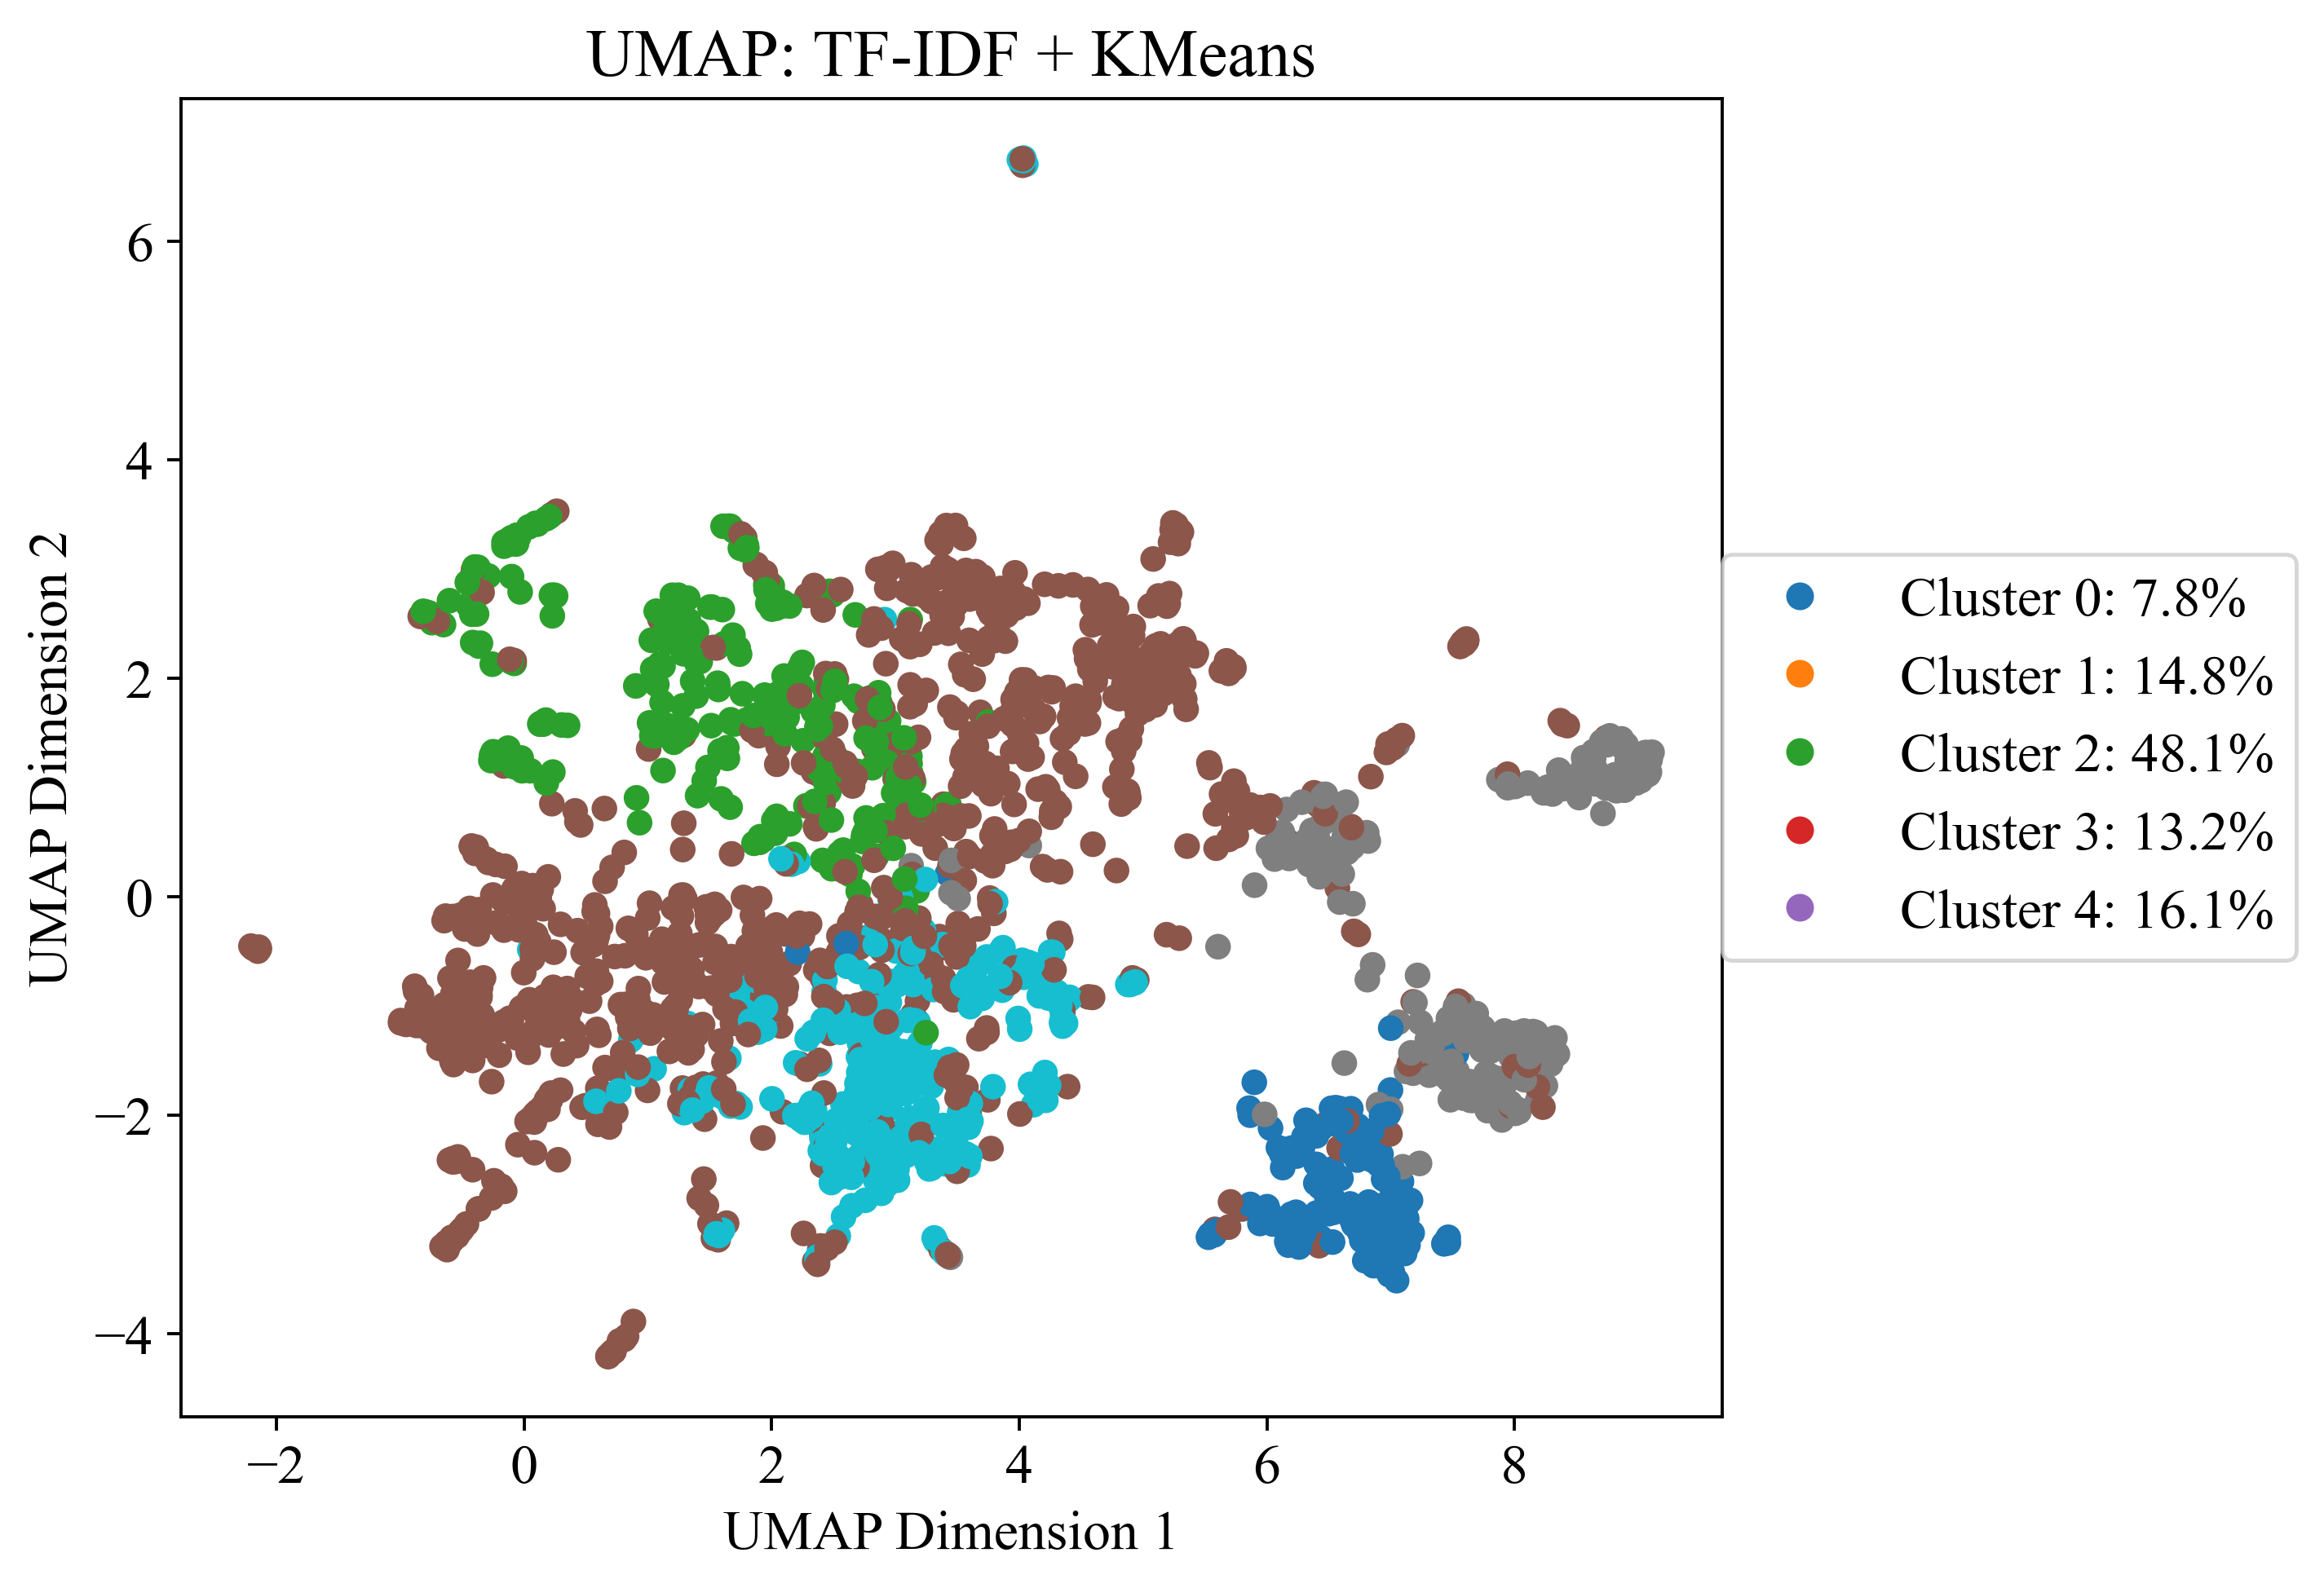


=== METHOD 2: BERT + KMeans ===
[BERT] Generating vector representations...


Batches:   0%|          | 0/70 [00:00<?, ?it/s]

[BERT] Done!
=== Clustering (KMeans) ===
KMeans done!

--- BERT + KMeans METRICS ---
silhouette: 0.0528
calinski_harabasz: 102.1483
davies_bouldin: 3.5202
adjusted_rand: 0.3837
homogeneity: 0.4128
completeness: 0.4124
v_measure: 0.4126


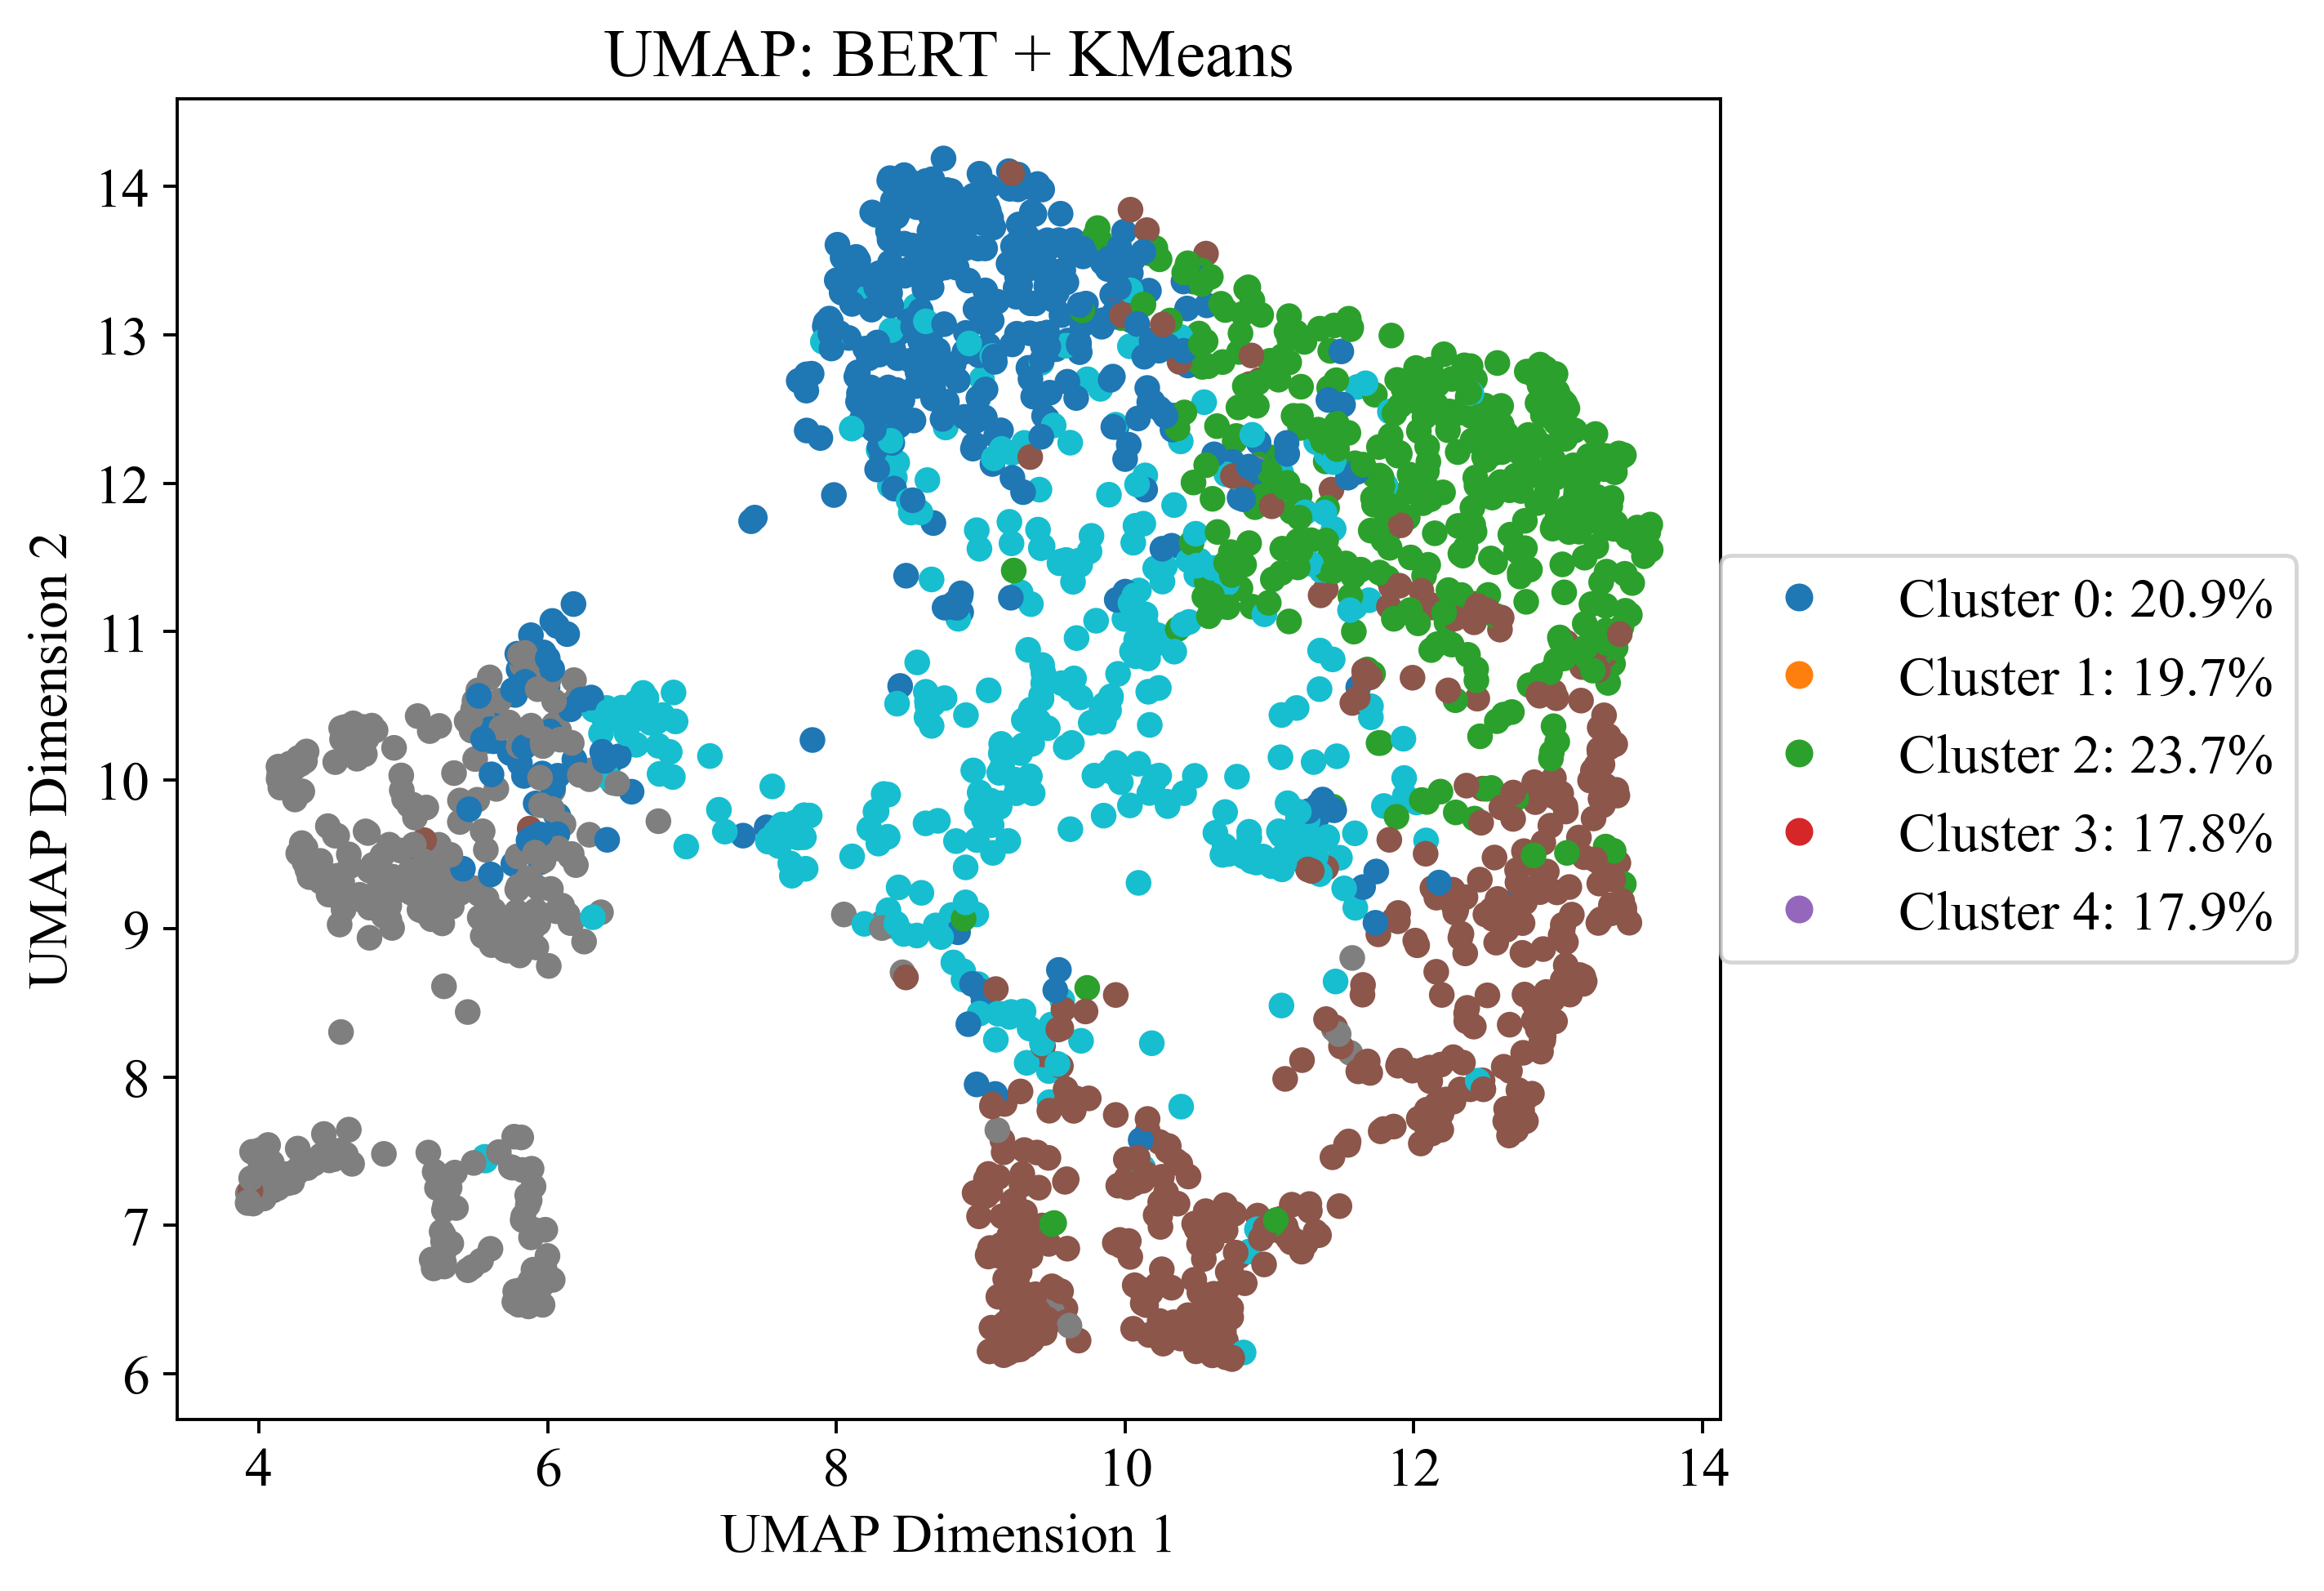


=== METHOD 3: LDA_BERT + KMeans ===
[LDA_BERT] Generating vector representations...


Batches:   0%|          | 0/70 [00:00<?, ?it/s]

[LDA_BERT] Training autoencoder...


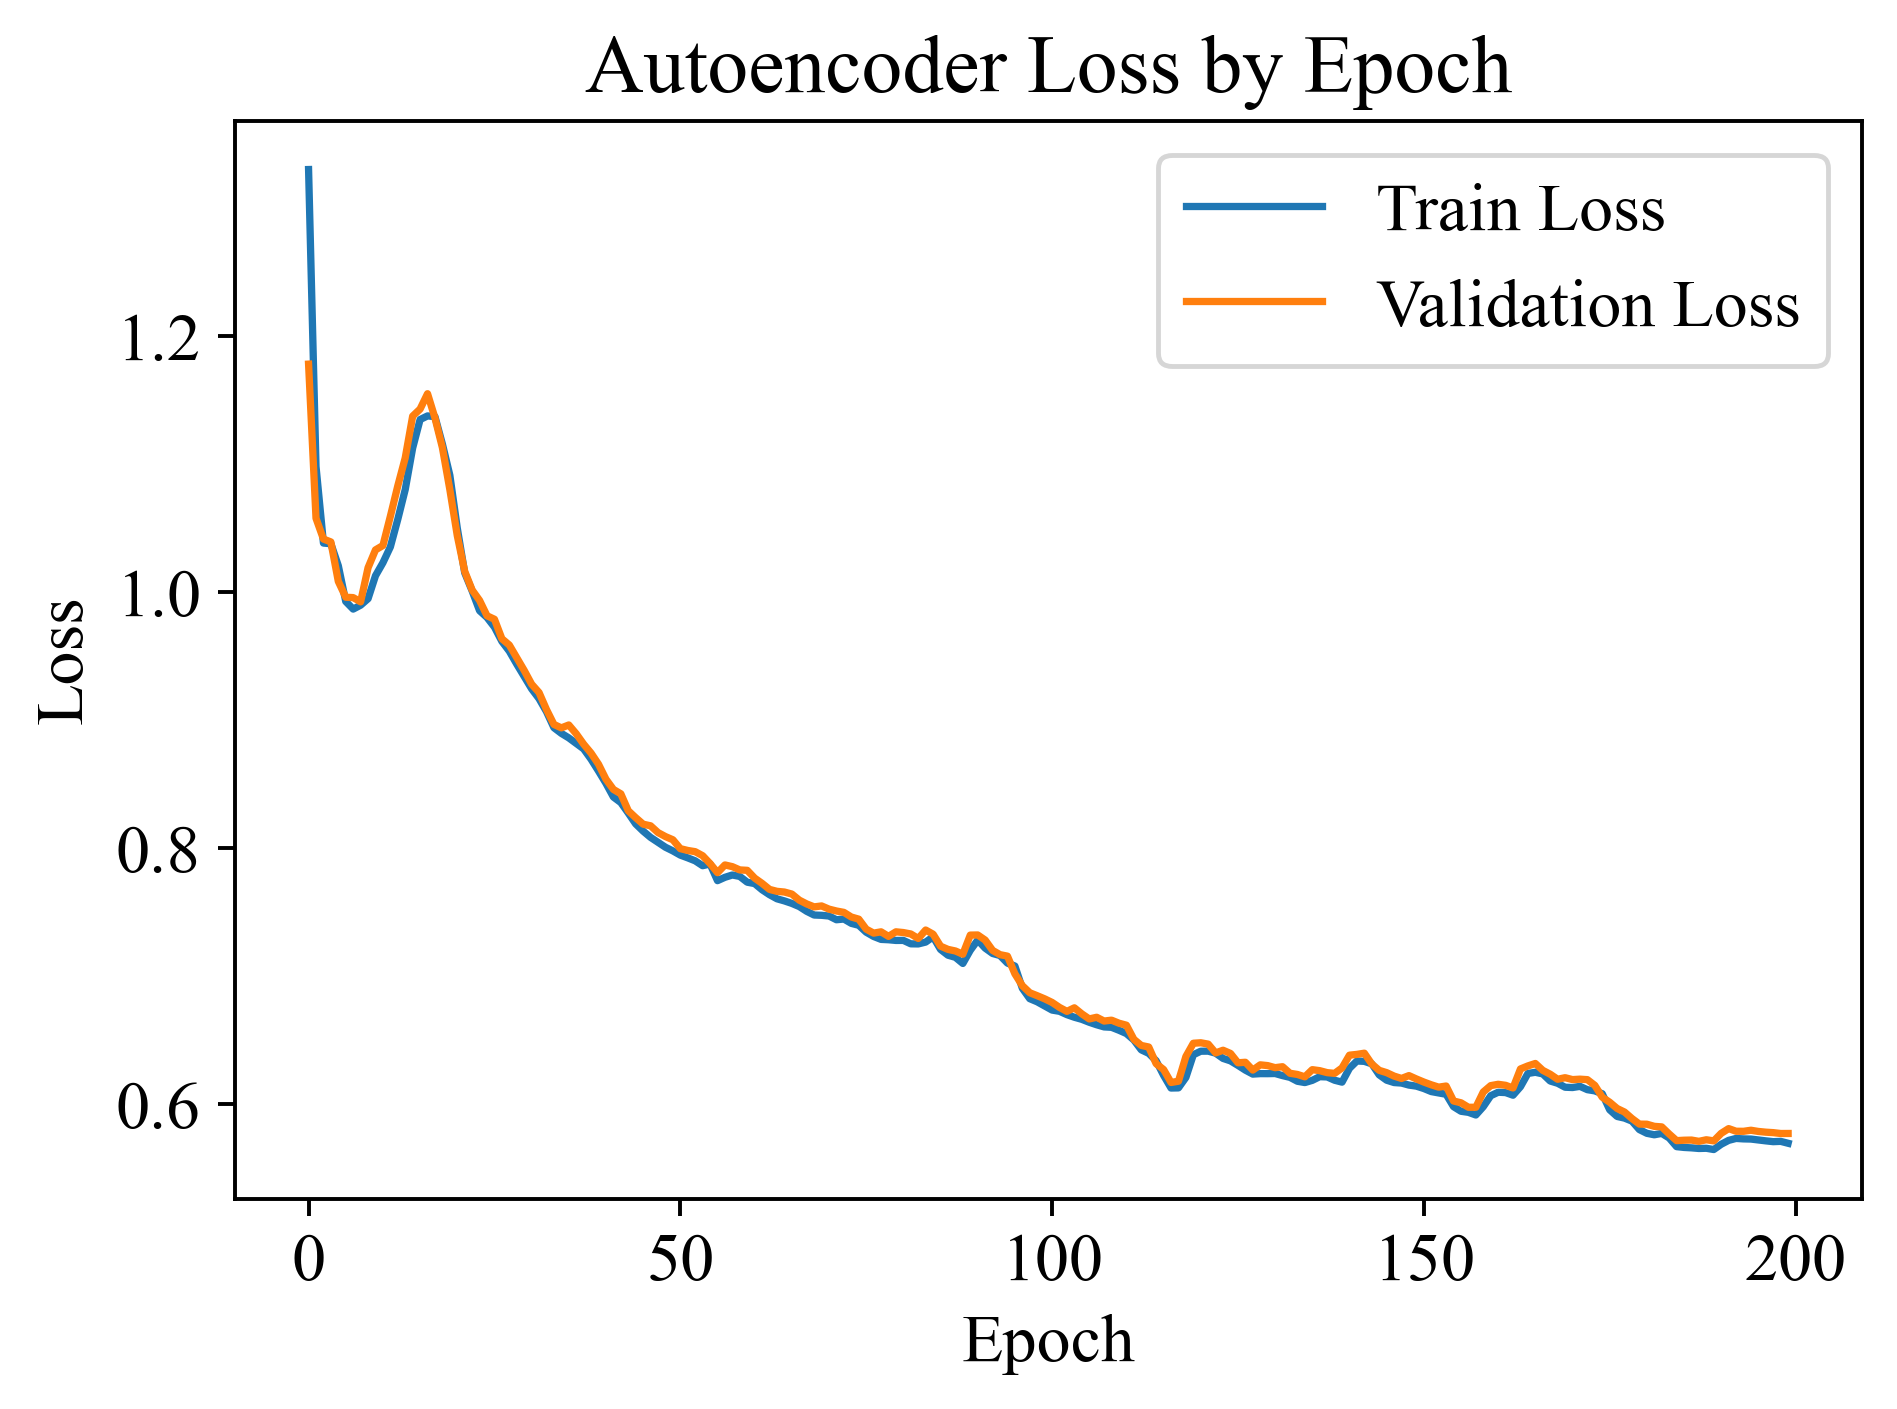

[LDA_BERT] Autoencoder training complete!
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[LDA_BERT] Done!
=== Clustering (KMeans) ===
KMeans done!

--- LDA_BERT + KMeans METRICS ---
silhouette: 0.4118
calinski_harabasz: 1973.4906
davies_bouldin: 1.1599
adjusted_rand: 0.6216
homogeneity: 0.6325
completeness: 0.6376
v_measure: 0.6350
Coherence (LDA part, c_v): 0.2535


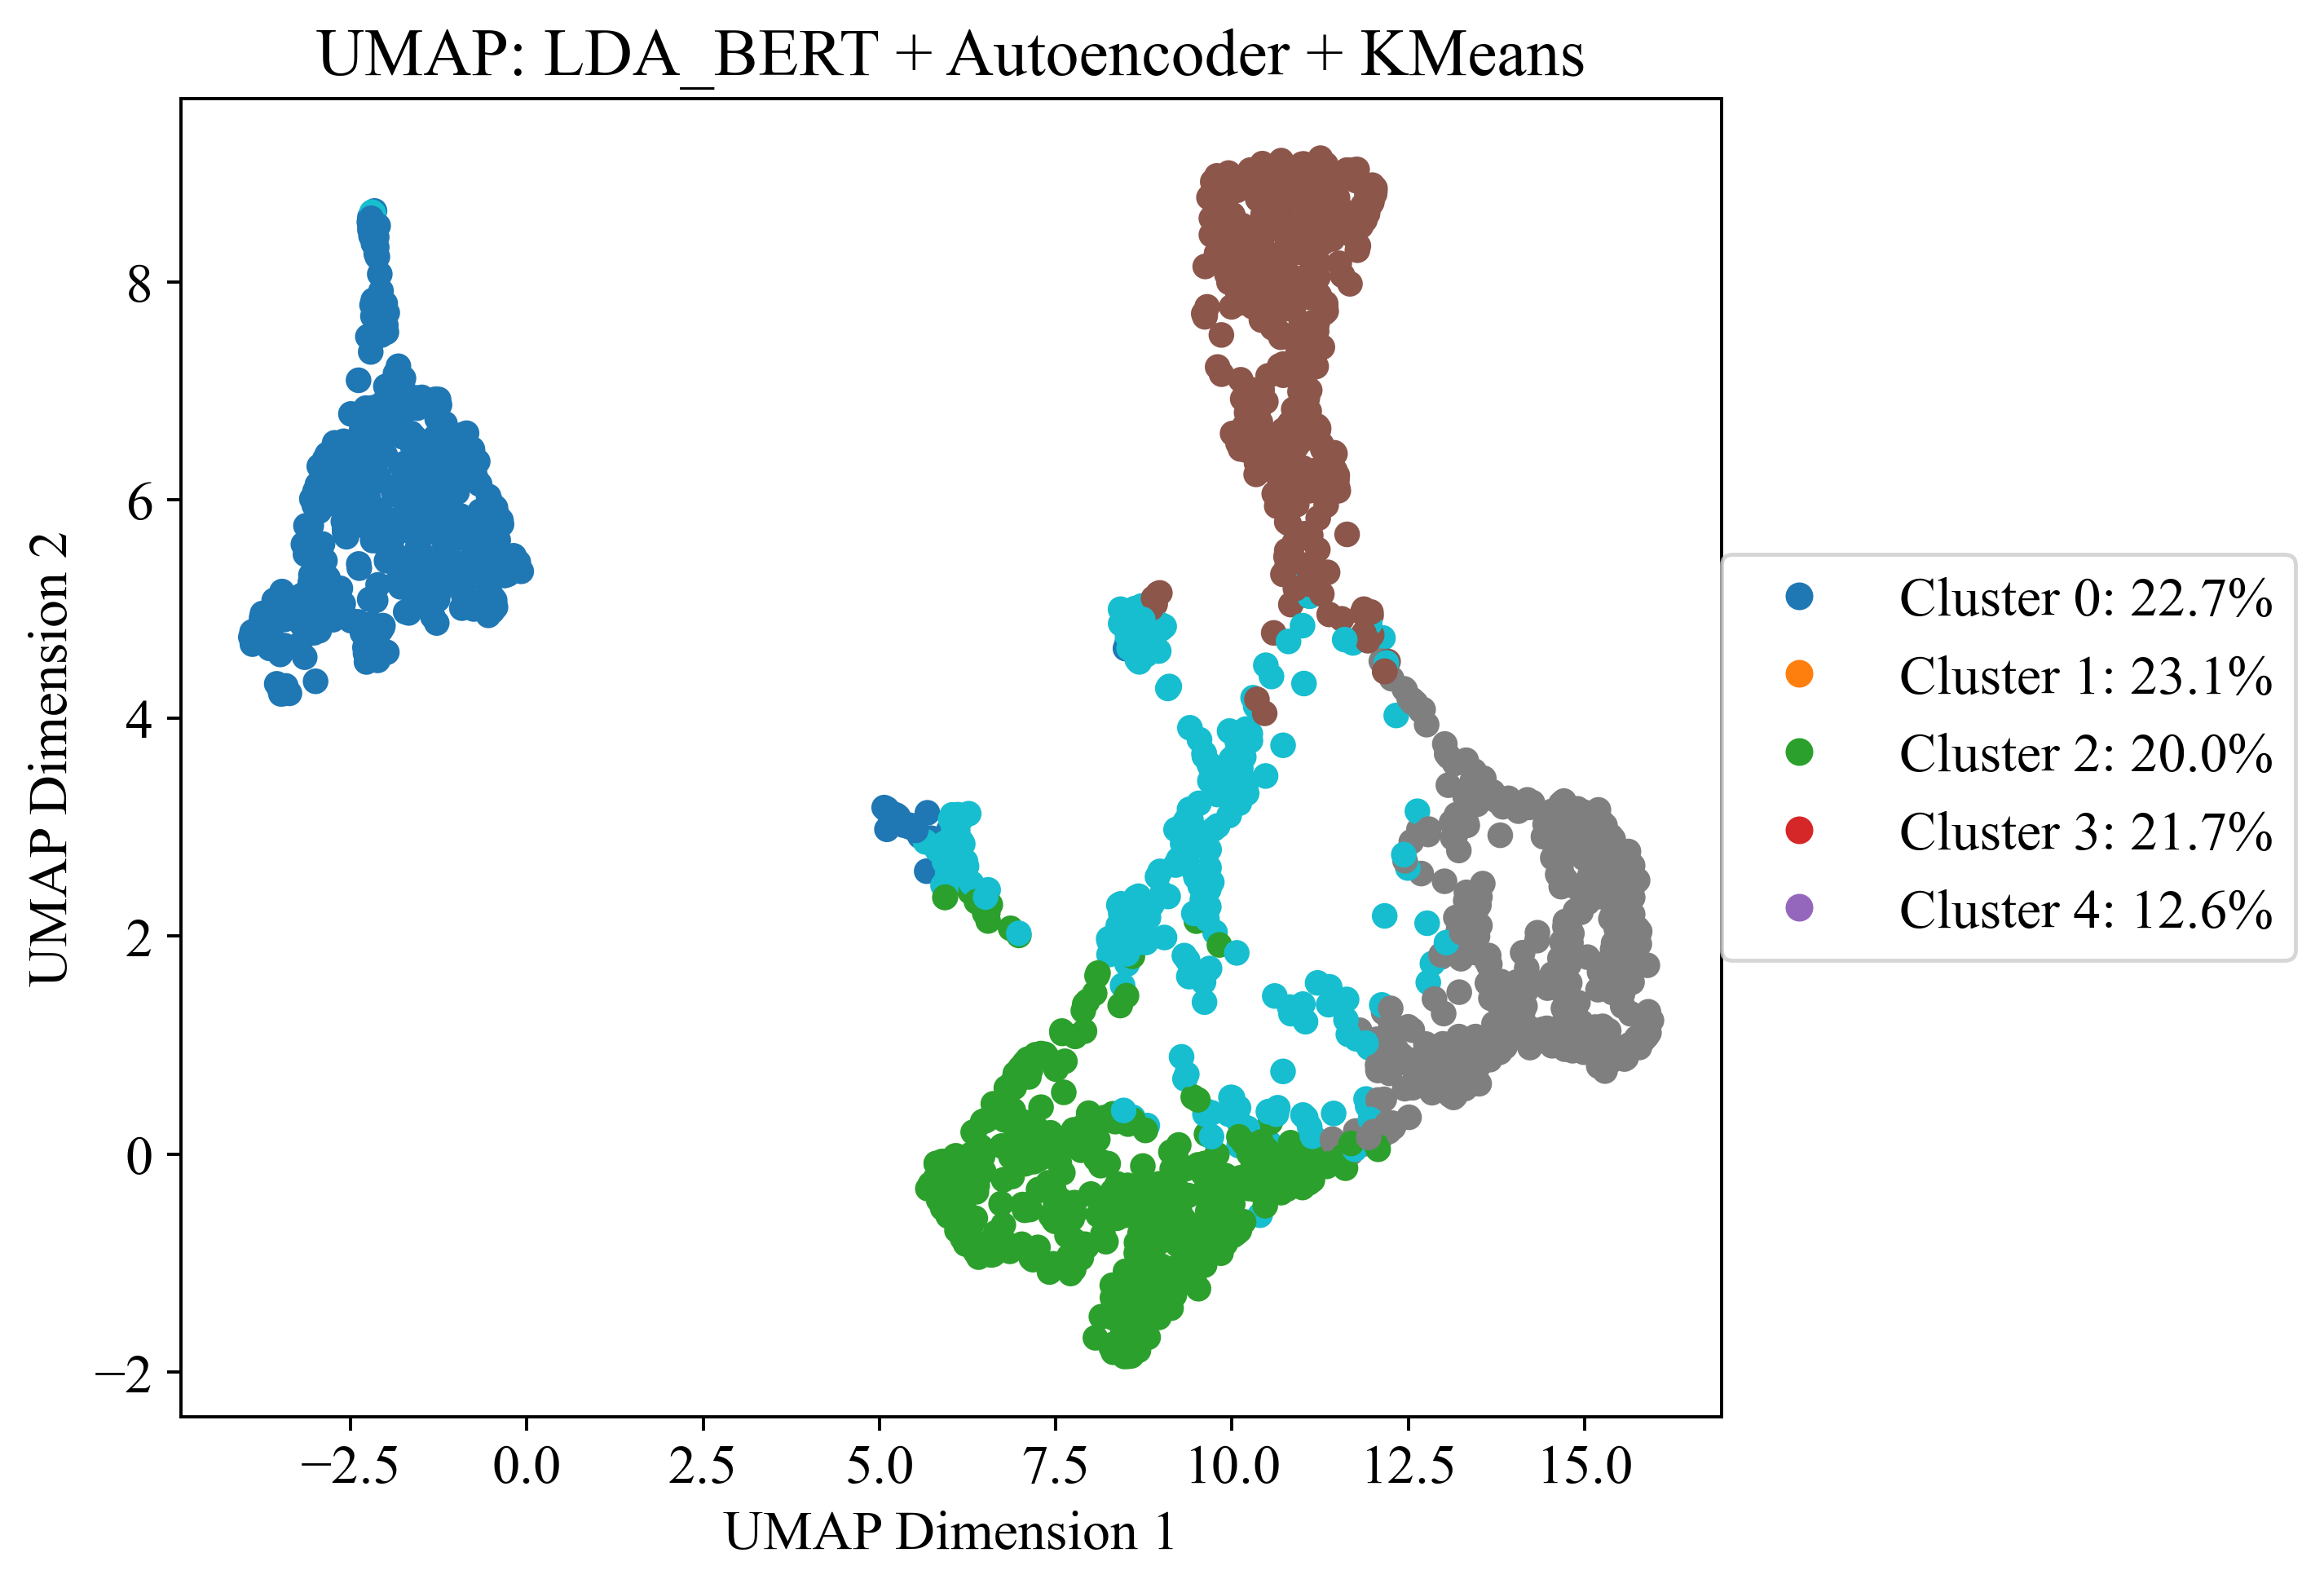


=== Classification with Random Forest and SVM ===

=== Random Forest Classifier ===
--- Random Forest METRICS ---
silhouette: 0.0067
calinski_harabasz: 3.8458
davies_bouldin: 7.1732
adjusted_rand: 0.9344
homogeneity: 0.9157
completeness: 0.9172
v_measure: 0.9164


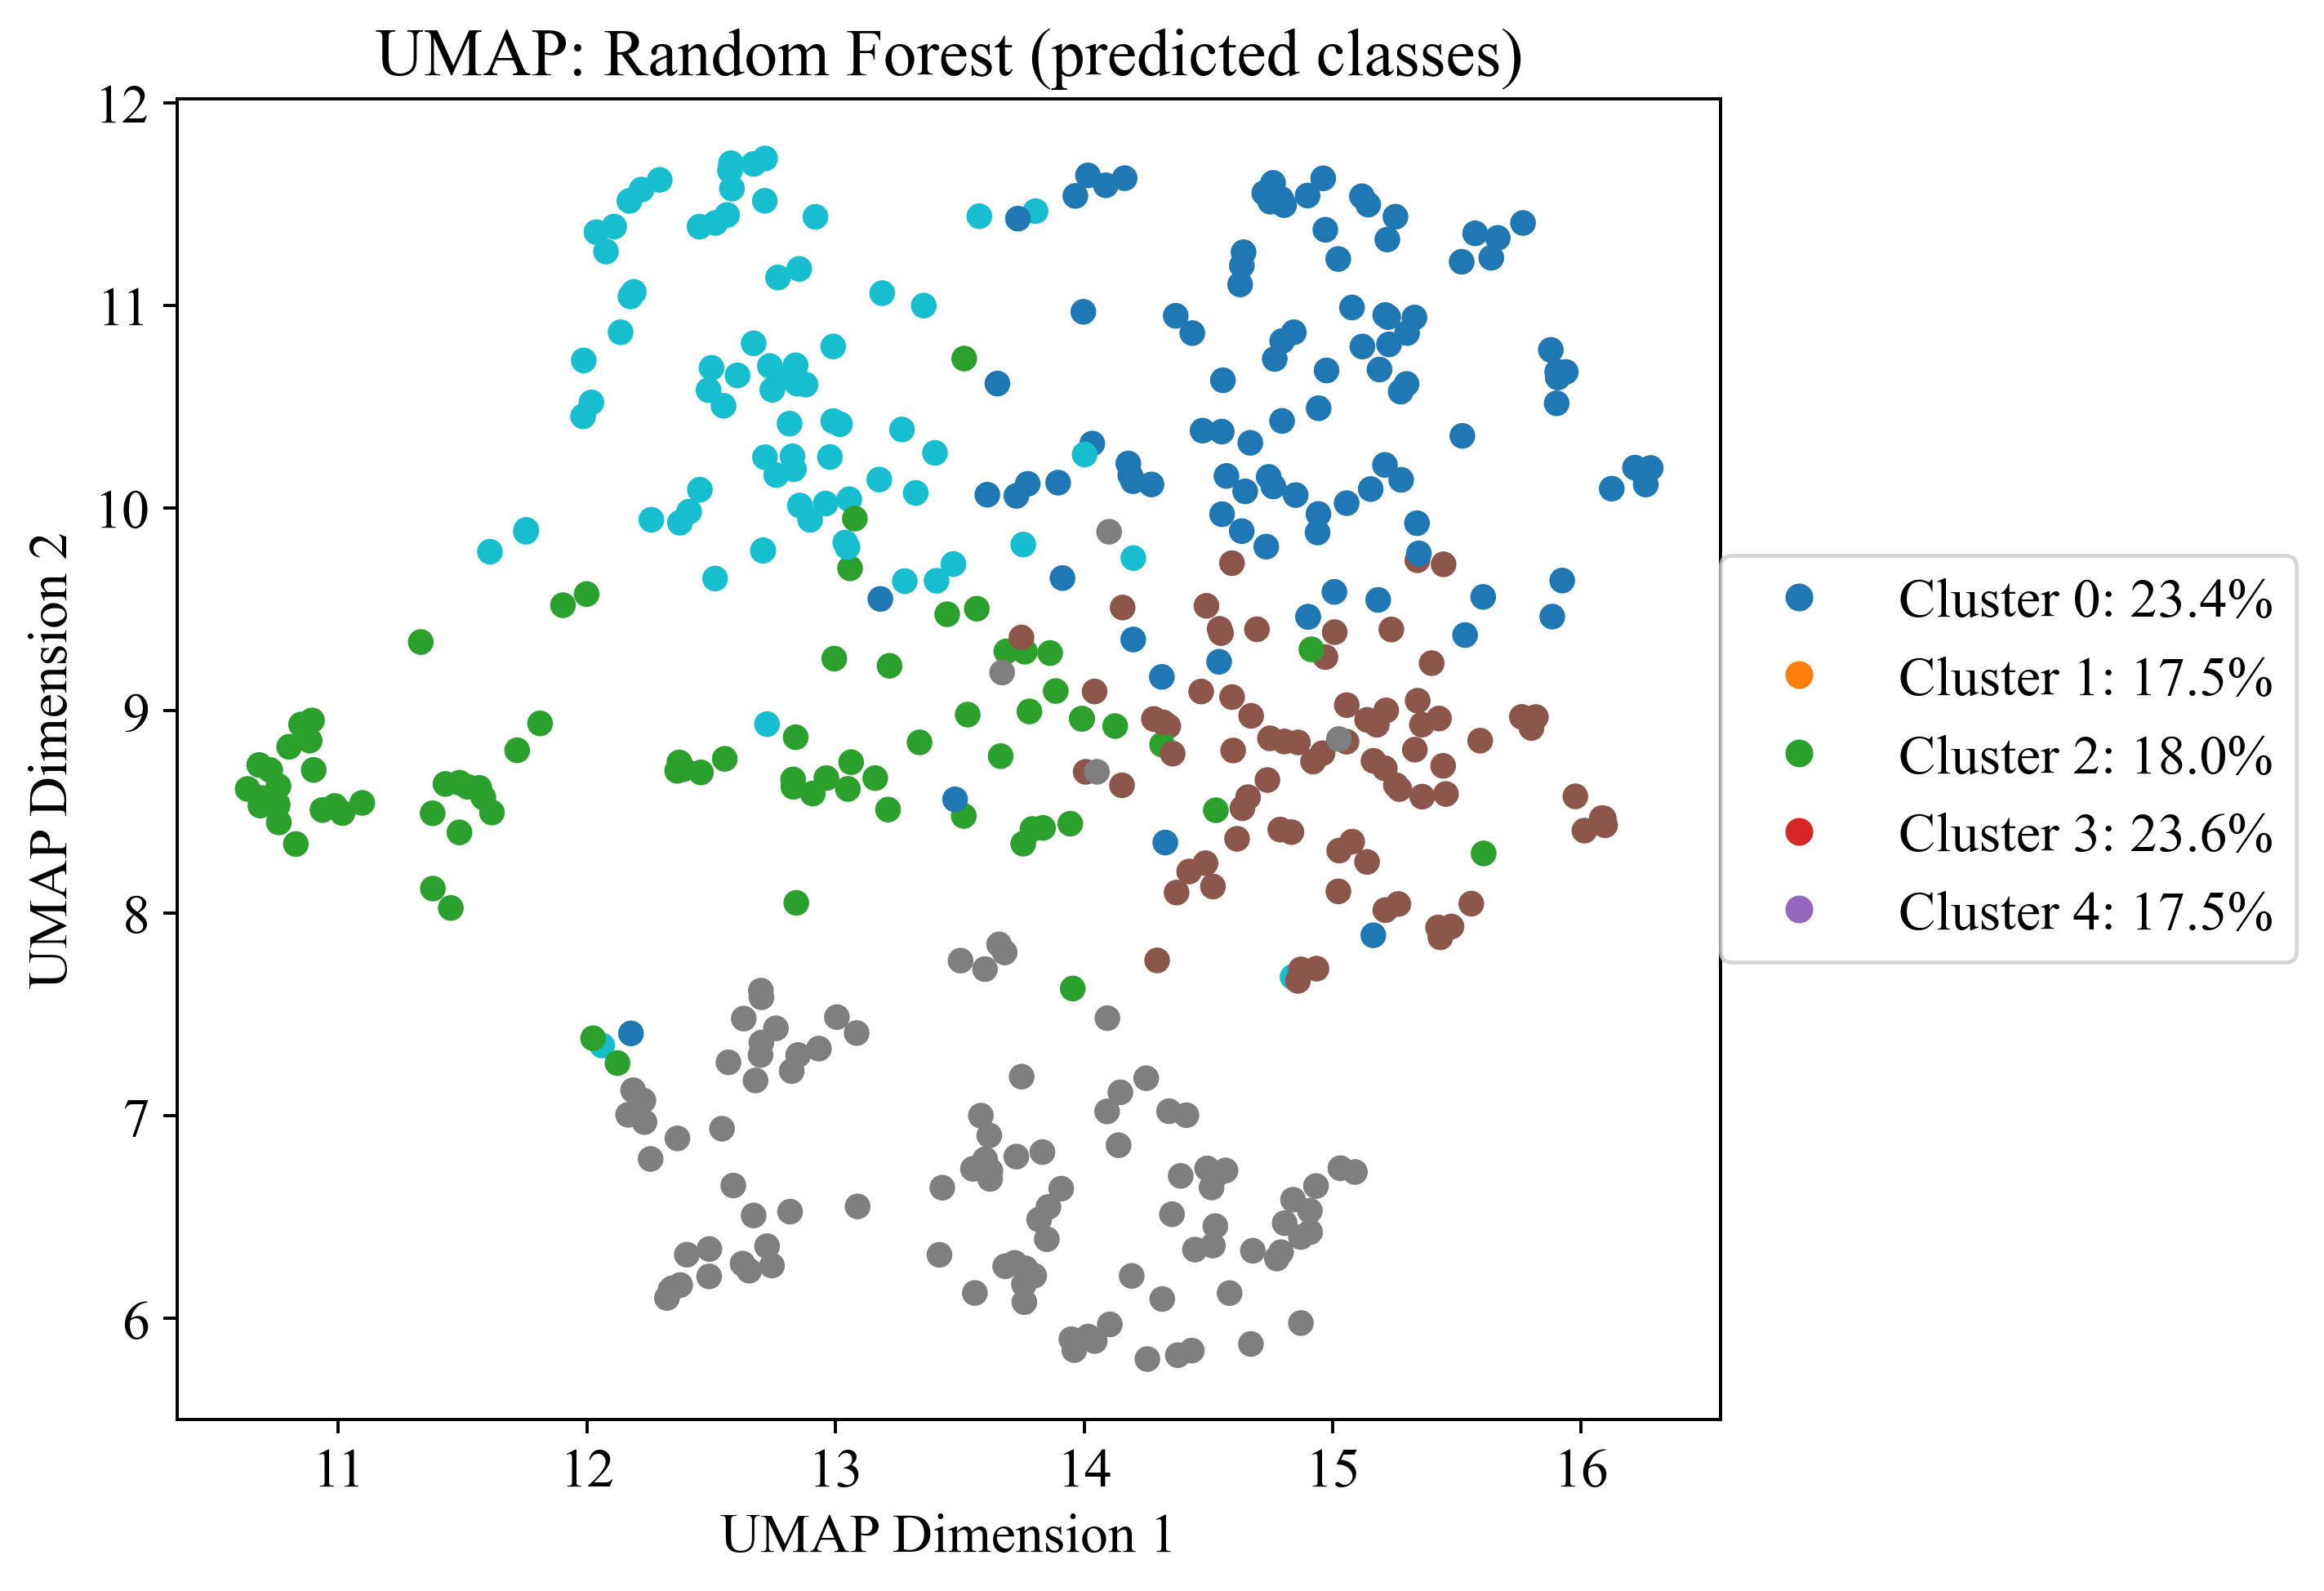


=== SVM Classifier (linear kernel) ===
--- SVM METRICS ---
silhouette: 0.0073
calinski_harabasz: 3.8487
davies_bouldin: 7.1510
adjusted_rand: 0.9524
homogeneity: 0.9351
completeness: 0.9355
v_measure: 0.9353


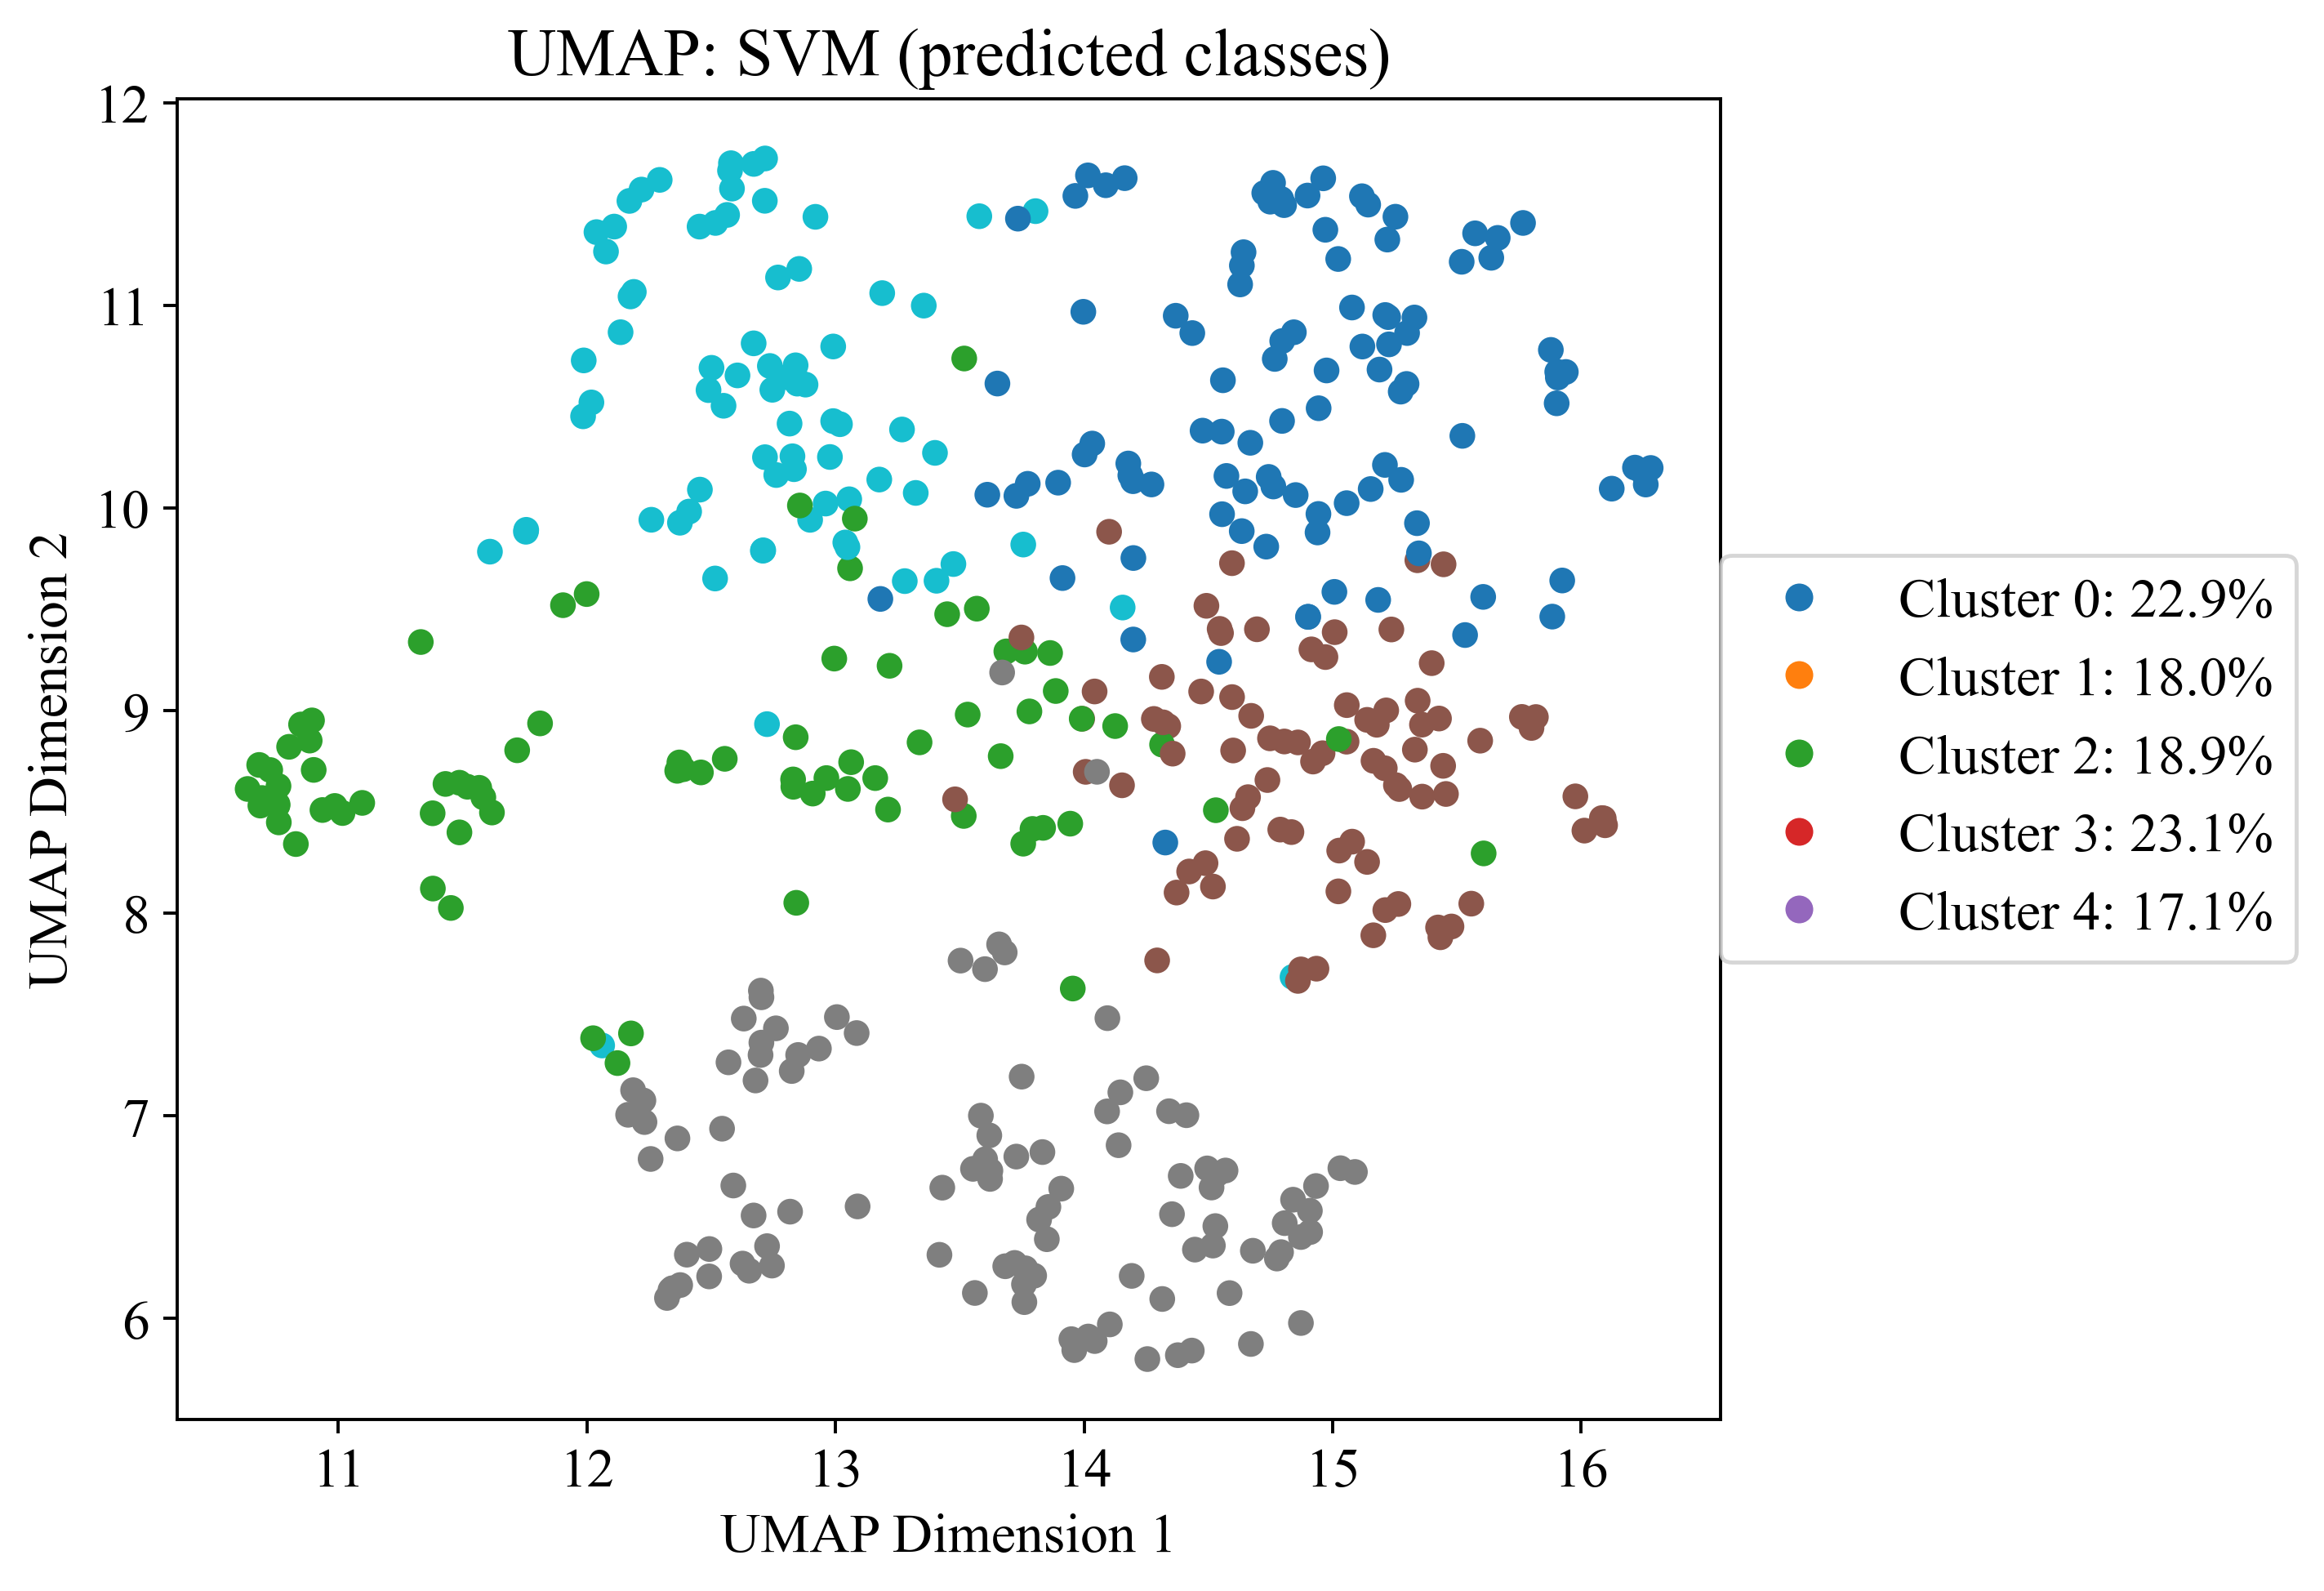

In [34]:
# ============================== [CELL 7] ==============================
# 7) Train TF-IDF, BERT, LDA_BERT models, evaluate, visualize, save.
#    Then, train Random Forest and SVM classifiers using the same dataset
#    (TF-IDF representation for classification), evaluate, visualize, and
#    finally compare all metrics in a bar chart.

print("=== Start of snippet code for training and visualization ===")

# Global font settings (override if needed)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14

num_clusters = 5  # e.g., BBC has 5 topics
reducer = umap.UMAP(random_state=42)

def plot_proj_with_legend(embedding, labels, title):
    """
    Plots a 2D UMAP embedding with legend showing cluster distribution.
    """
    fig, ax = plt.subplots(figsize=(8, 6), dpi=350)
    
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='tab10', s=30)
    ax.set_title(title)
    ax.set_xlabel('UMAP Dimension 1')
    ax.set_ylabel('UMAP Dimension 2')
    
    unique_labels, counts = np.unique(labels, return_counts=True)
    total_points = len(labels)
    percentages = counts / total_points * 100.0
    
    legend_elements = []
    for i, cluster_id in enumerate(unique_labels):
        color = f"C{cluster_id}"
        label_text = f"Cluster {cluster_id}: {percentages[i]:.1f}%"
        legend_elements.append(
            Line2D([0],[0],
                   marker='o',
                   color='w',
                   label=label_text,
                   markerfacecolor=color,
                   markersize=8)
        )
    legend = ax.legend(
        handles=legend_elements,
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        borderaxespad=0
    )
    fig.subplots_adjust(right=0.8)
    plt.show()

print("Notebook snippet for training TF-IDF, BERT, and LDA_BERT models.")


# ------------------------------------------------------
# 1) TF-IDF + KMeans
# ------------------------------------------------------
print("=== METHOD 1: TF-IDF + KMeans ===")
model_tfidf = Topic_Model(k=num_clusters, method='TFIDF')
model_tfidf.topic_labels = {0: 'tech', 1: 'business', 2: 'sport', 3: 'entertainment', 4: 'politics'}

model_tfidf.fit(sentences, token_lists)

X_tfidf = model_tfidf.vec['TFIDF']
labels_tfidf = model_tfidf.cluster_model.labels_

metrics_tfidf = evaluate_clustering(X_tfidf, labels_tfidf, ground_truth=categories)
print("\n--- TF-IDF + KMeans METRICS ---")
for m, v in metrics_tfidf.items():
    print(f"{m}: {v:.4f}")

embedding_tfidf = reducer.fit_transform(X_tfidf)
plot_proj_with_legend(embedding_tfidf, labels_tfidf, "UMAP: TF-IDF + KMeans")

with open("tfidf_model.pkl", "wb") as f:
    pickle.dump(model_tfidf, f)

print("==============================================\n")


# ------------------------------------------------------
# 2) BERT + KMeans
# ------------------------------------------------------
print("=== METHOD 2: BERT + KMeans ===")
model_bert = Topic_Model(k=num_clusters, method='BERT')
model_bert.topic_labels = {0: 'tech', 1: 'business', 2: 'sport', 3: 'entertainment', 4: 'politics'}

model_bert.fit(sentences, token_lists)

X_bert = model_bert.vec['BERT']
labels_bert = model_bert.cluster_model.labels_

metrics_bert = evaluate_clustering(X_bert, labels_bert, ground_truth=categories)
print("\n--- BERT + KMeans METRICS ---")
for m, v in metrics_bert.items():
    print(f"{m}: {v:.4f}")

embedding_bert = reducer.fit_transform(X_bert)
plot_proj_with_legend(embedding_bert, labels_bert, "UMAP: BERT + KMeans")

with open("bert_model.pkl", "wb") as f:
    pickle.dump(model_bert, f)

print("==============================================\n")


# ------------------------------------------------------
# 3) LDA_BERT + Autoencoder + KMeans
# ------------------------------------------------------
print("=== METHOD 3: LDA_BERT + KMeans ===")
model_ldabert = Topic_Model(k=num_clusters, method='LDA_BERT')
model_ldabert.topic_labels = {0: 'tech', 1: 'business', 2: 'sport', 3: 'entertainment', 4: 'politics'}

model_ldabert.fit(sentences, token_lists)

X_ldabert = model_ldabert.vec['LDA_BERT']
labels_ldabert = model_ldabert.cluster_model.labels_

metrics_ldabert = evaluate_clustering(X_ldabert, labels_ldabert, ground_truth=categories)
print("\n--- LDA_BERT + KMeans METRICS ---")
for m, v in metrics_ldabert.items():
    print(f"{m}: {v:.4f}")

# Optionally compute LDA coherence
if model_ldabert.ldamodel is not None:
    cm = CoherenceModel(
        model=model_ldabert.ldamodel,
        texts=token_lists,
        dictionary=model_ldabert.dictionary,
        corpus=model_ldabert.corpus,
        coherence='c_v'
    )
    coherence_ldabert = cm.get_coherence()
    print(f"Coherence (LDA part, c_v): {coherence_ldabert:.4f}")

embedding_ldabert = reducer.fit_transform(X_ldabert)
plot_proj_with_legend(embedding_ldabert, labels_ldabert, "UMAP: LDA_BERT + Autoencoder + KMeans")

with open("ldabert_model.pkl", "wb") as f:
    pickle.dump(model_ldabert, f)

print("==============================================\n")


# -----------------------------------------------------------------------------------
# 4) Classification approaches (Random Forest, SVM) using TF-IDF representation
# -----------------------------------------------------------------------------------
# We will treat 'categories' as ground truth labels. We must ensure they exist.
# If categories is None, classification is meaningless. So we proceed if not None.

all_metrics = {
    'TF-IDF_KMeans': metrics_tfidf,
    'BERT_KMeans': metrics_bert,
    'LDA_BERT_KMeans': metrics_ldabert
}

if categories is not None:
    print("=== Classification with Random Forest and SVM ===")

    # Prepare train/test for classification
    from sklearn.model_selection import train_test_split
    # Encode textual categories to numeric if needed
    unique_cats = np.unique(categories)
    cat_to_id = {cat: idx for idx, cat in enumerate(unique_cats)}
    y = np.array([cat_to_id[c] for c in categories])

    # We can reuse X_tfidf as features for classification
    X_train, X_test, y_train, y_test = train_test_split(
        X_tfidf, y, test_size=0.2, random_state=42, stratify=y
    )

    # ---------------- Random Forest ----------------
    print("\n=== Random Forest Classifier ===")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    metrics_rf = evaluate_clustering(X_test, y_pred_rf, ground_truth=y_test)
    print("--- Random Forest METRICS ---")
    for m, v in metrics_rf.items():
        print(f"{m}: {v:.4f}")

    # UMAP visualization for classification
    embedding_rf = reducer.fit_transform(X_test.toarray())
    plot_proj_with_legend(embedding_rf, y_pred_rf, "UMAP: Random Forest (predicted classes)")

    with open("rf_model.pkl", "wb") as f:
        pickle.dump(rf_model, f)

    all_metrics['RandomForest'] = metrics_rf

    # ---------------- SVM ----------------
    print("\n=== SVM Classifier (linear kernel) ===")
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)

    metrics_svm = evaluate_clustering(X_test, y_pred_svm, ground_truth=y_test)
    print("--- SVM METRICS ---")
    for m, v in metrics_svm.items():
        print(f"{m}: {v:.4f}")

    embedding_svm = reducer.fit_transform(X_test.toarray())
    plot_proj_with_legend(embedding_svm, y_pred_svm, "UMAP: SVM (predicted classes)")

    with open("svm_model.pkl", "wb") as f:
        pickle.dump(svm_model, f)

    all_metrics['SVM'] = metrics_svm

else:
    print("No ground-truth categories found. Classification models are skipped.")


# -----------------------------------------------------------------------------------
# 5) Final comparison: Bar chart of all metrics for all models
# -----------------------------------------------------------------------------------
# We'll compare the following metrics if they exist:
comparison_metrics = [
    'silhouette', 'calinski_harabasz', 'davies_bouldin',
    'adjusted_rand', 'homogeneity', 'completeness', 'v_measure'
]

model_names = list(all_metrics.keys())
score_matrix = []


In [35]:
# ============================ [ 9] ============================
print("==== Comparative ====")

print("\nTF-IDF + KMeans METRICS:")
for k, v in metrics_tfidf.items():
    print(f"{k}: {v:.4f}")

print("\nBERT + KMeans METRICS:")
for k, v in metrics_bert.items():
    print(f"{k}: {v:.4f}")

print("\nLDA_BERT + KMeans METRICS:")
for k, v in metrics_ldabert.items():
    print(f"{k}: {v:.4f}")
    
if model_ldabert.ldamodel is not None:
    print(f"Coherence (LDA part, c_v): {coherence_ldabert:.4f}")

print("\nRandom Forest METRICS:")
for k, v in metrics_rf.items():
    print(f"{k}: {v:.4f}")

print("\nSVM METRICS:")
for k, v in metrics_svm.items():
    print(f"{k}: {v:.4f}")

print("\n==== End ====")


==== Comparative ====

TF-IDF + KMeans METRICS:
silhouette: 0.0029
calinski_harabasz: 14.4955
davies_bouldin: 8.0584
adjusted_rand: 0.4277
homogeneity: 0.5581
completeness: 0.6408
v_measure: 0.5966

BERT + KMeans METRICS:
silhouette: 0.0528
calinski_harabasz: 102.1483
davies_bouldin: 3.5202
adjusted_rand: 0.3837
homogeneity: 0.4128
completeness: 0.4124
v_measure: 0.4126

LDA_BERT + KMeans METRICS:
silhouette: 0.4118
calinski_harabasz: 1973.4906
davies_bouldin: 1.1599
adjusted_rand: 0.6216
homogeneity: 0.6325
completeness: 0.6376
v_measure: 0.6350
Coherence (LDA part, c_v): 0.2535

Random Forest METRICS:
silhouette: 0.0067
calinski_harabasz: 3.8458
davies_bouldin: 7.1732
adjusted_rand: 0.9344
homogeneity: 0.9157
completeness: 0.9172
v_measure: 0.9164

SVM METRICS:
silhouette: 0.0073
calinski_harabasz: 3.8487
davies_bouldin: 7.1510
adjusted_rand: 0.9524
homogeneity: 0.9351
completeness: 0.9355
v_measure: 0.9353

==== End ====


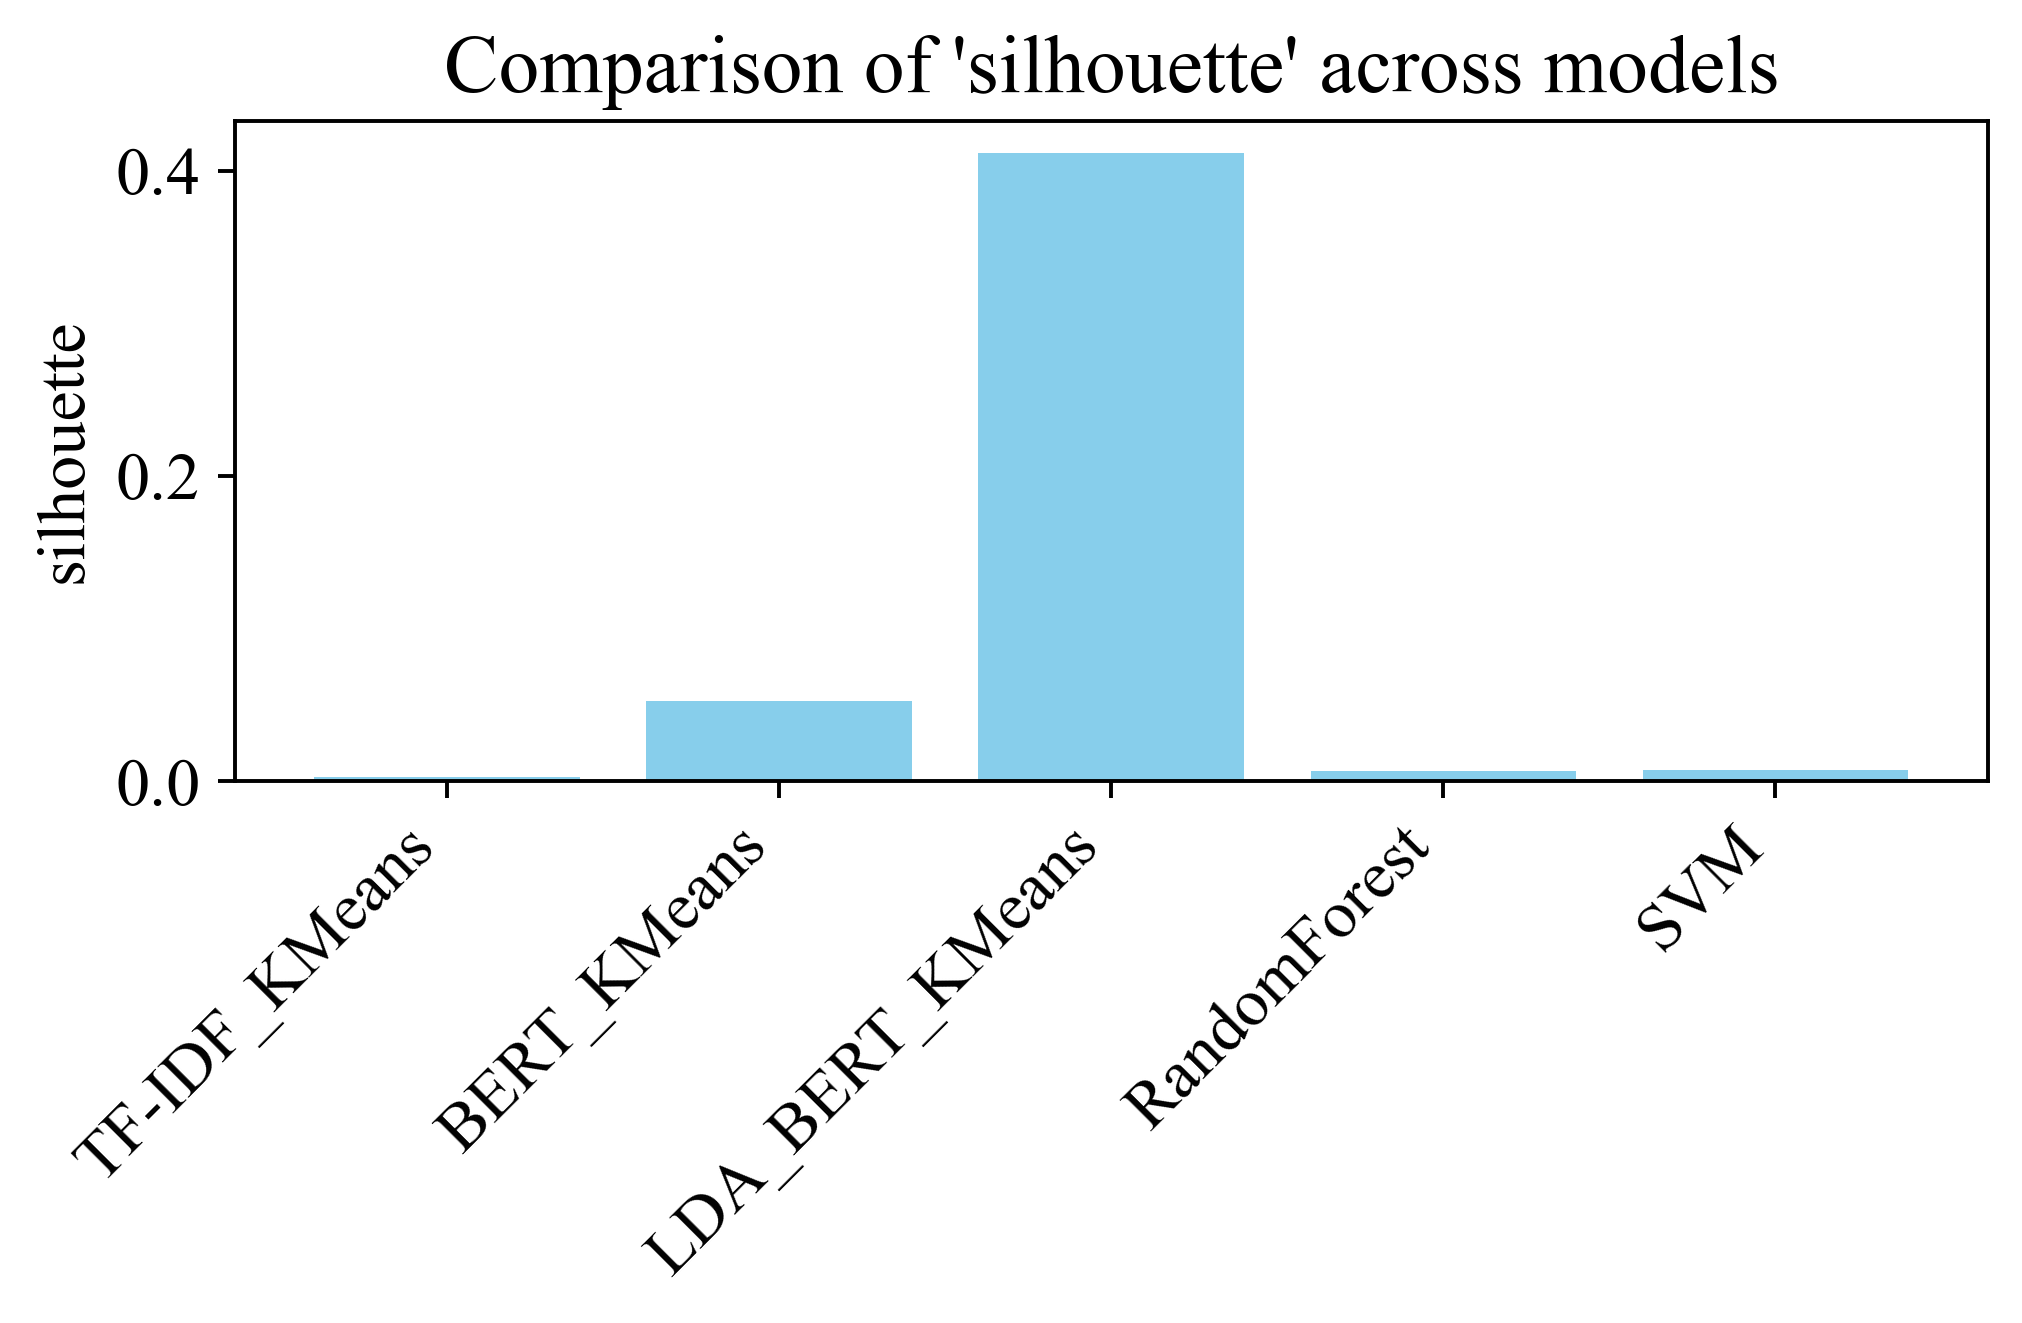

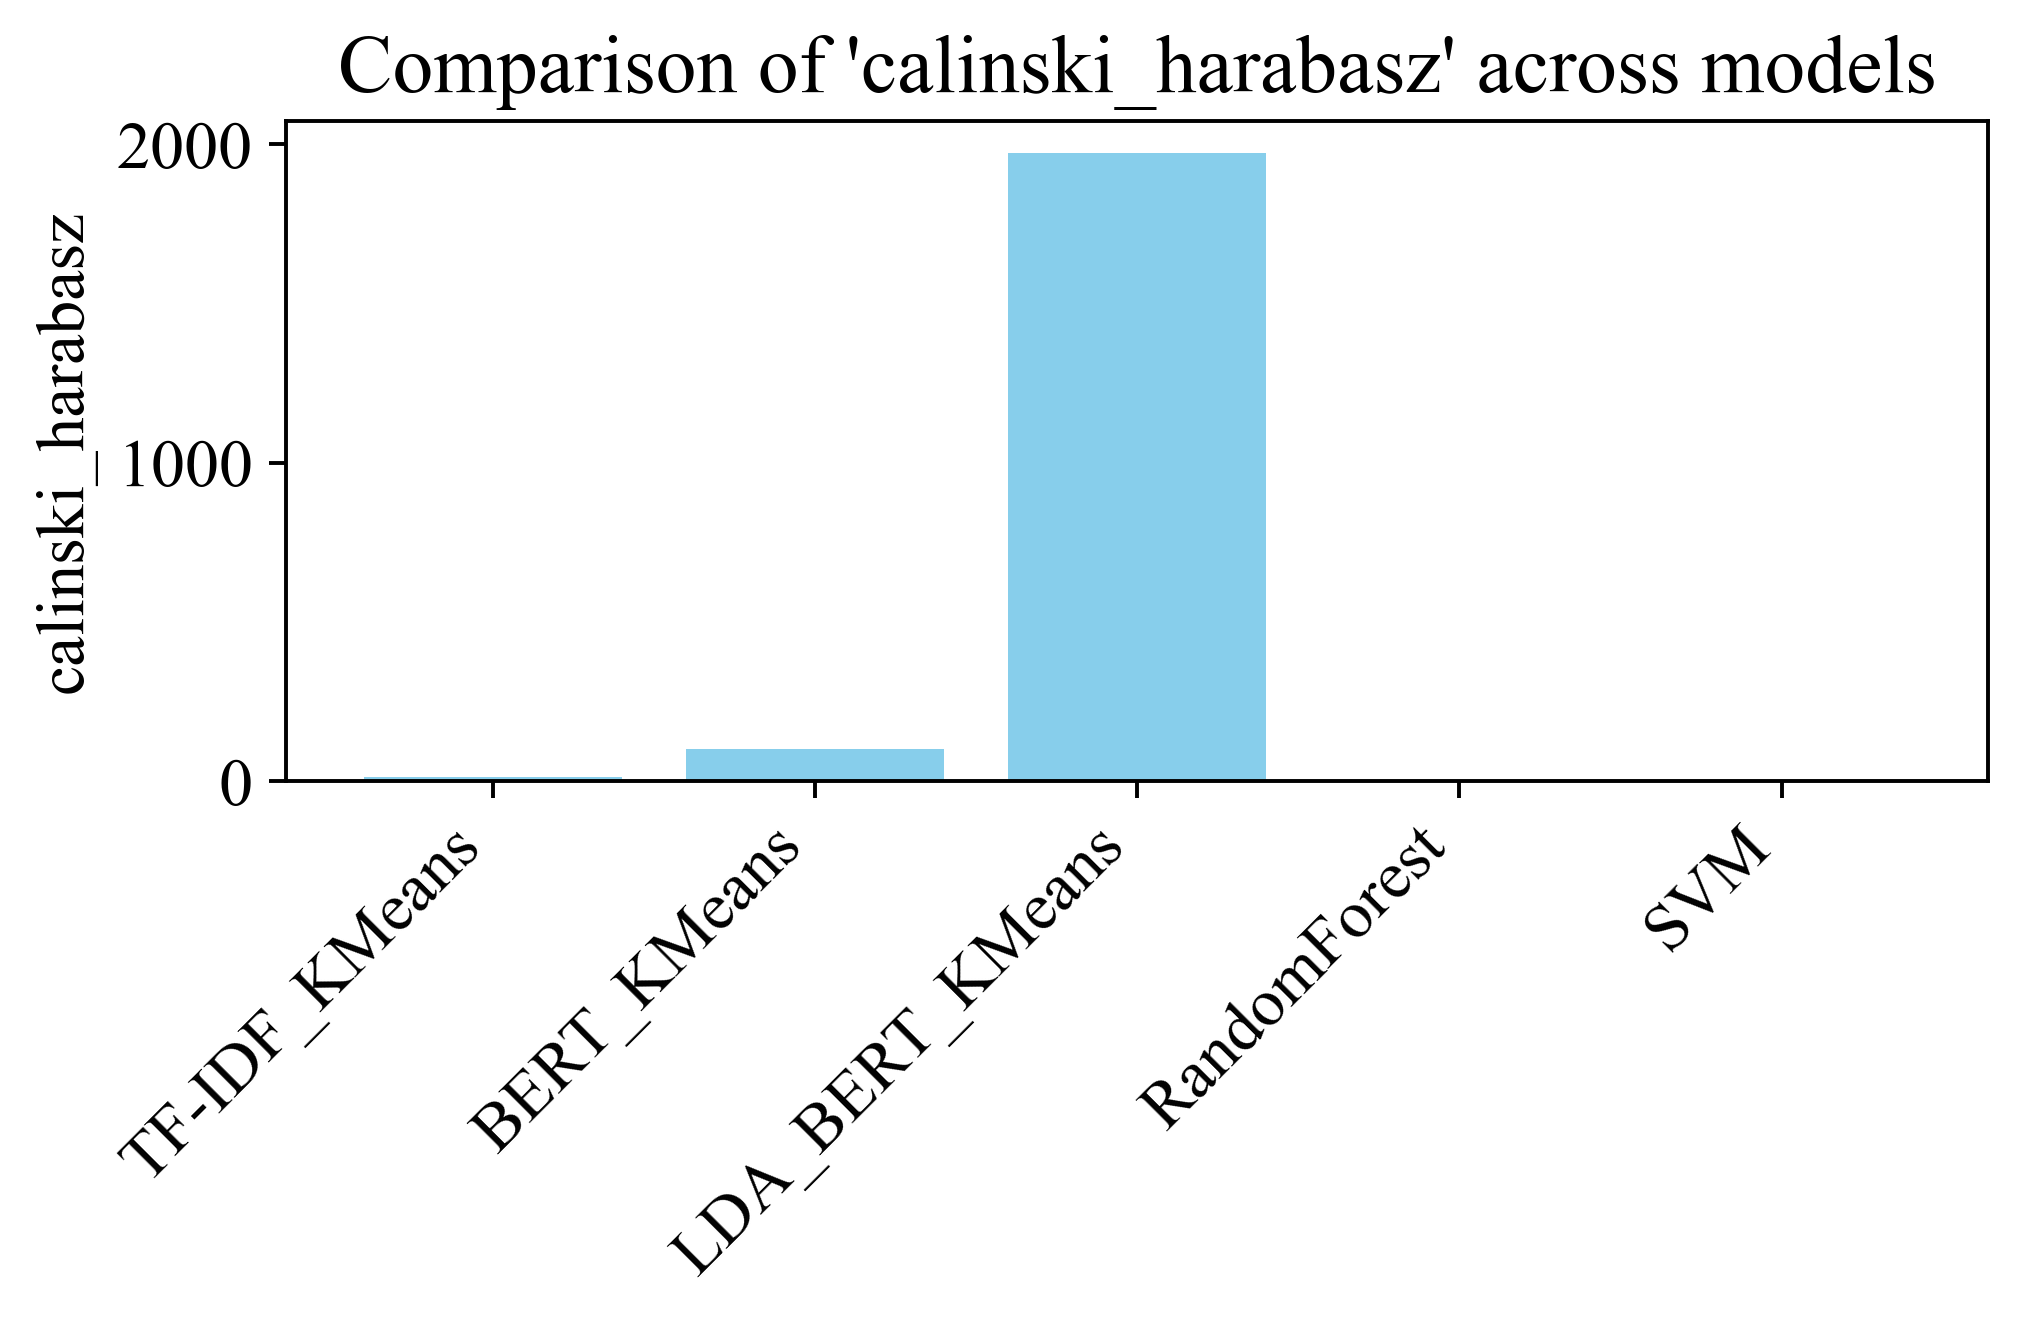

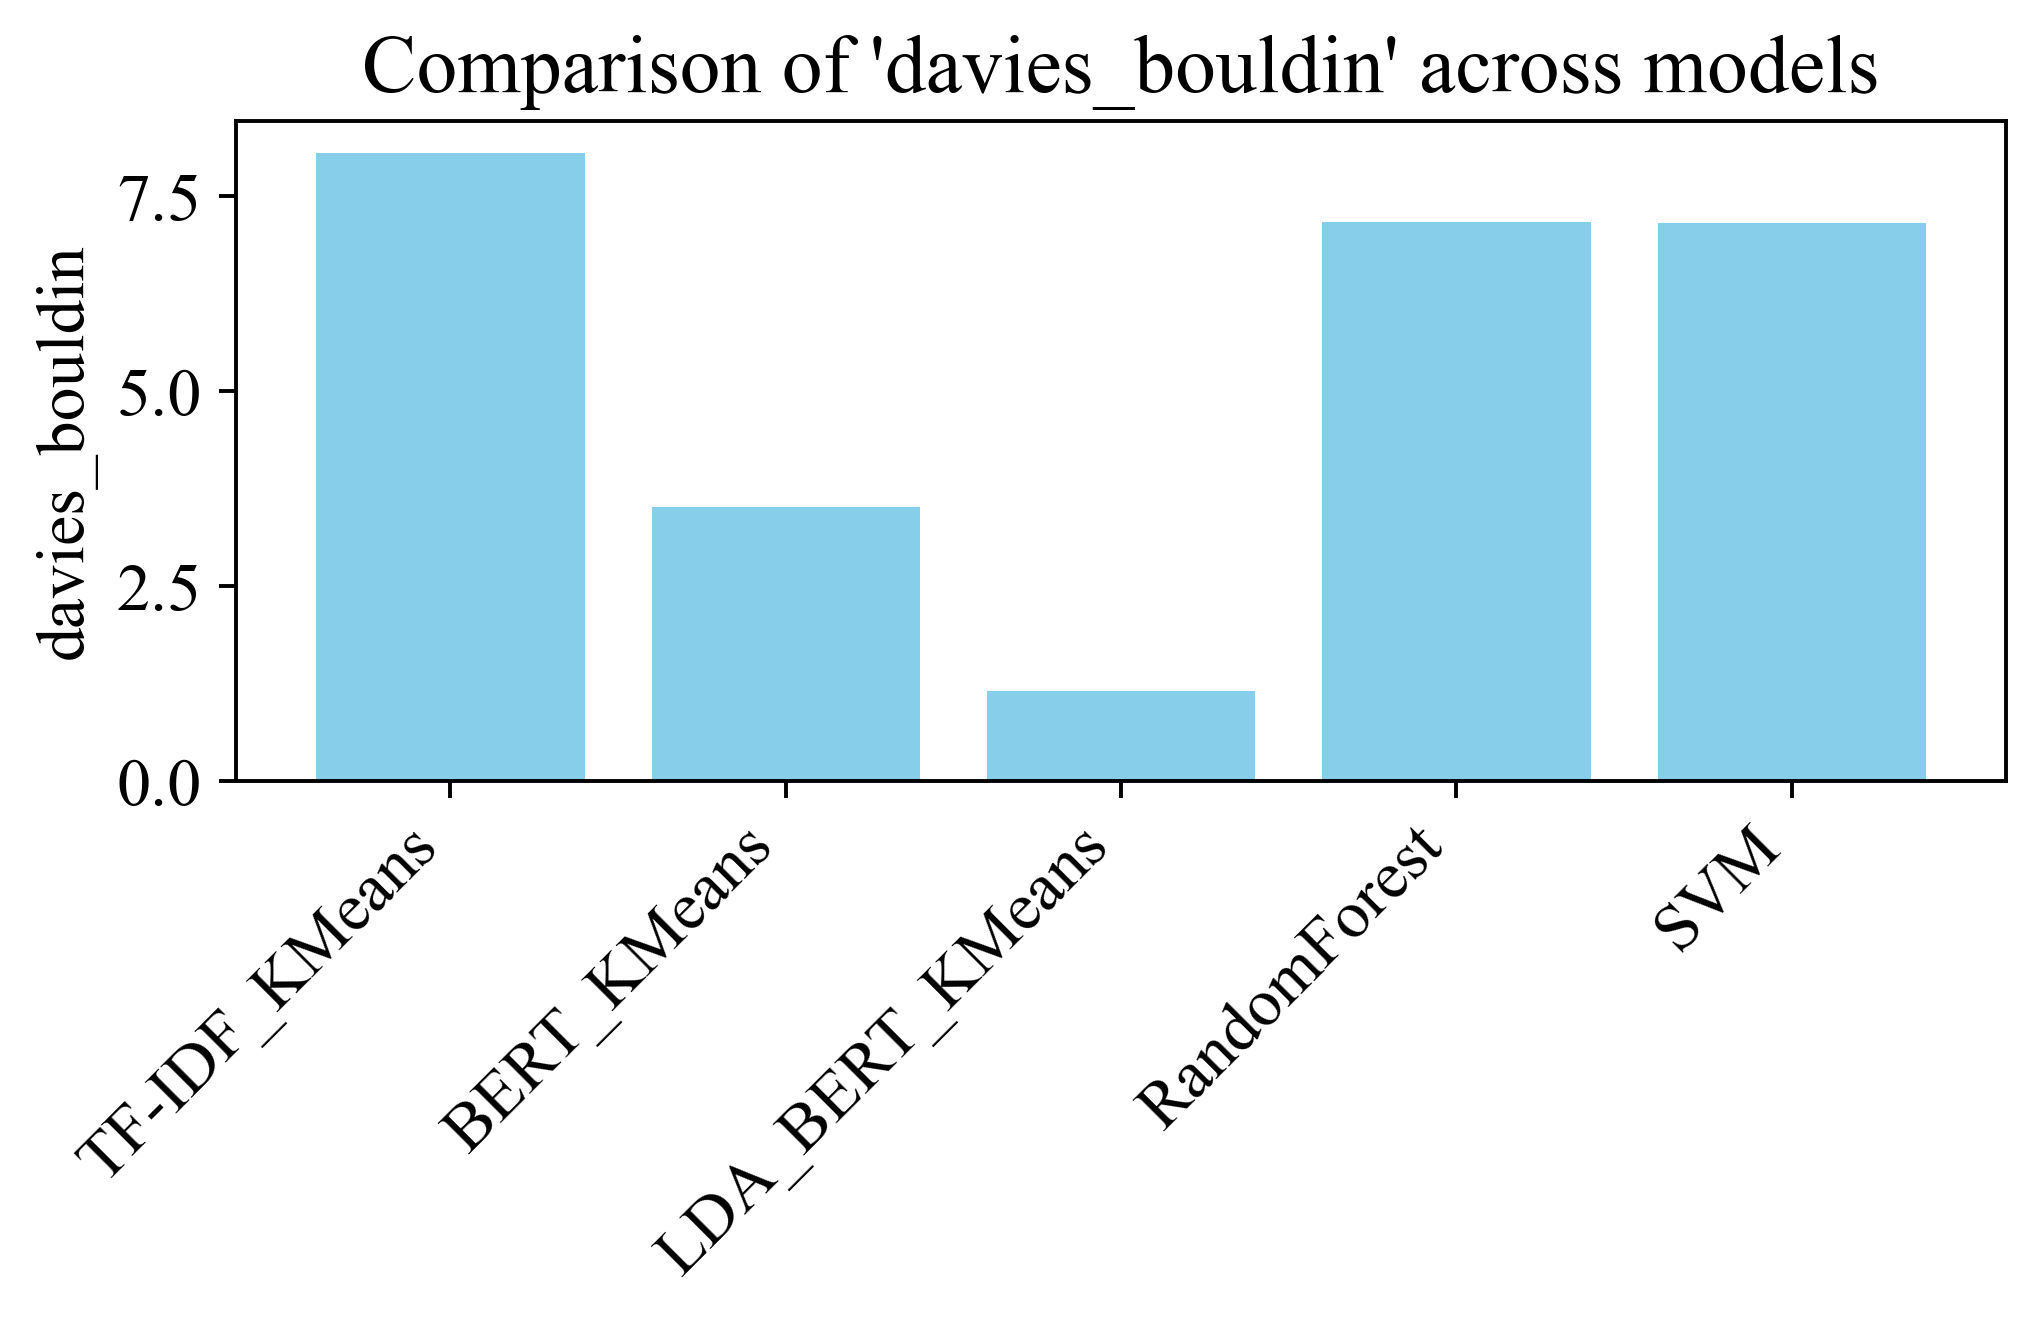

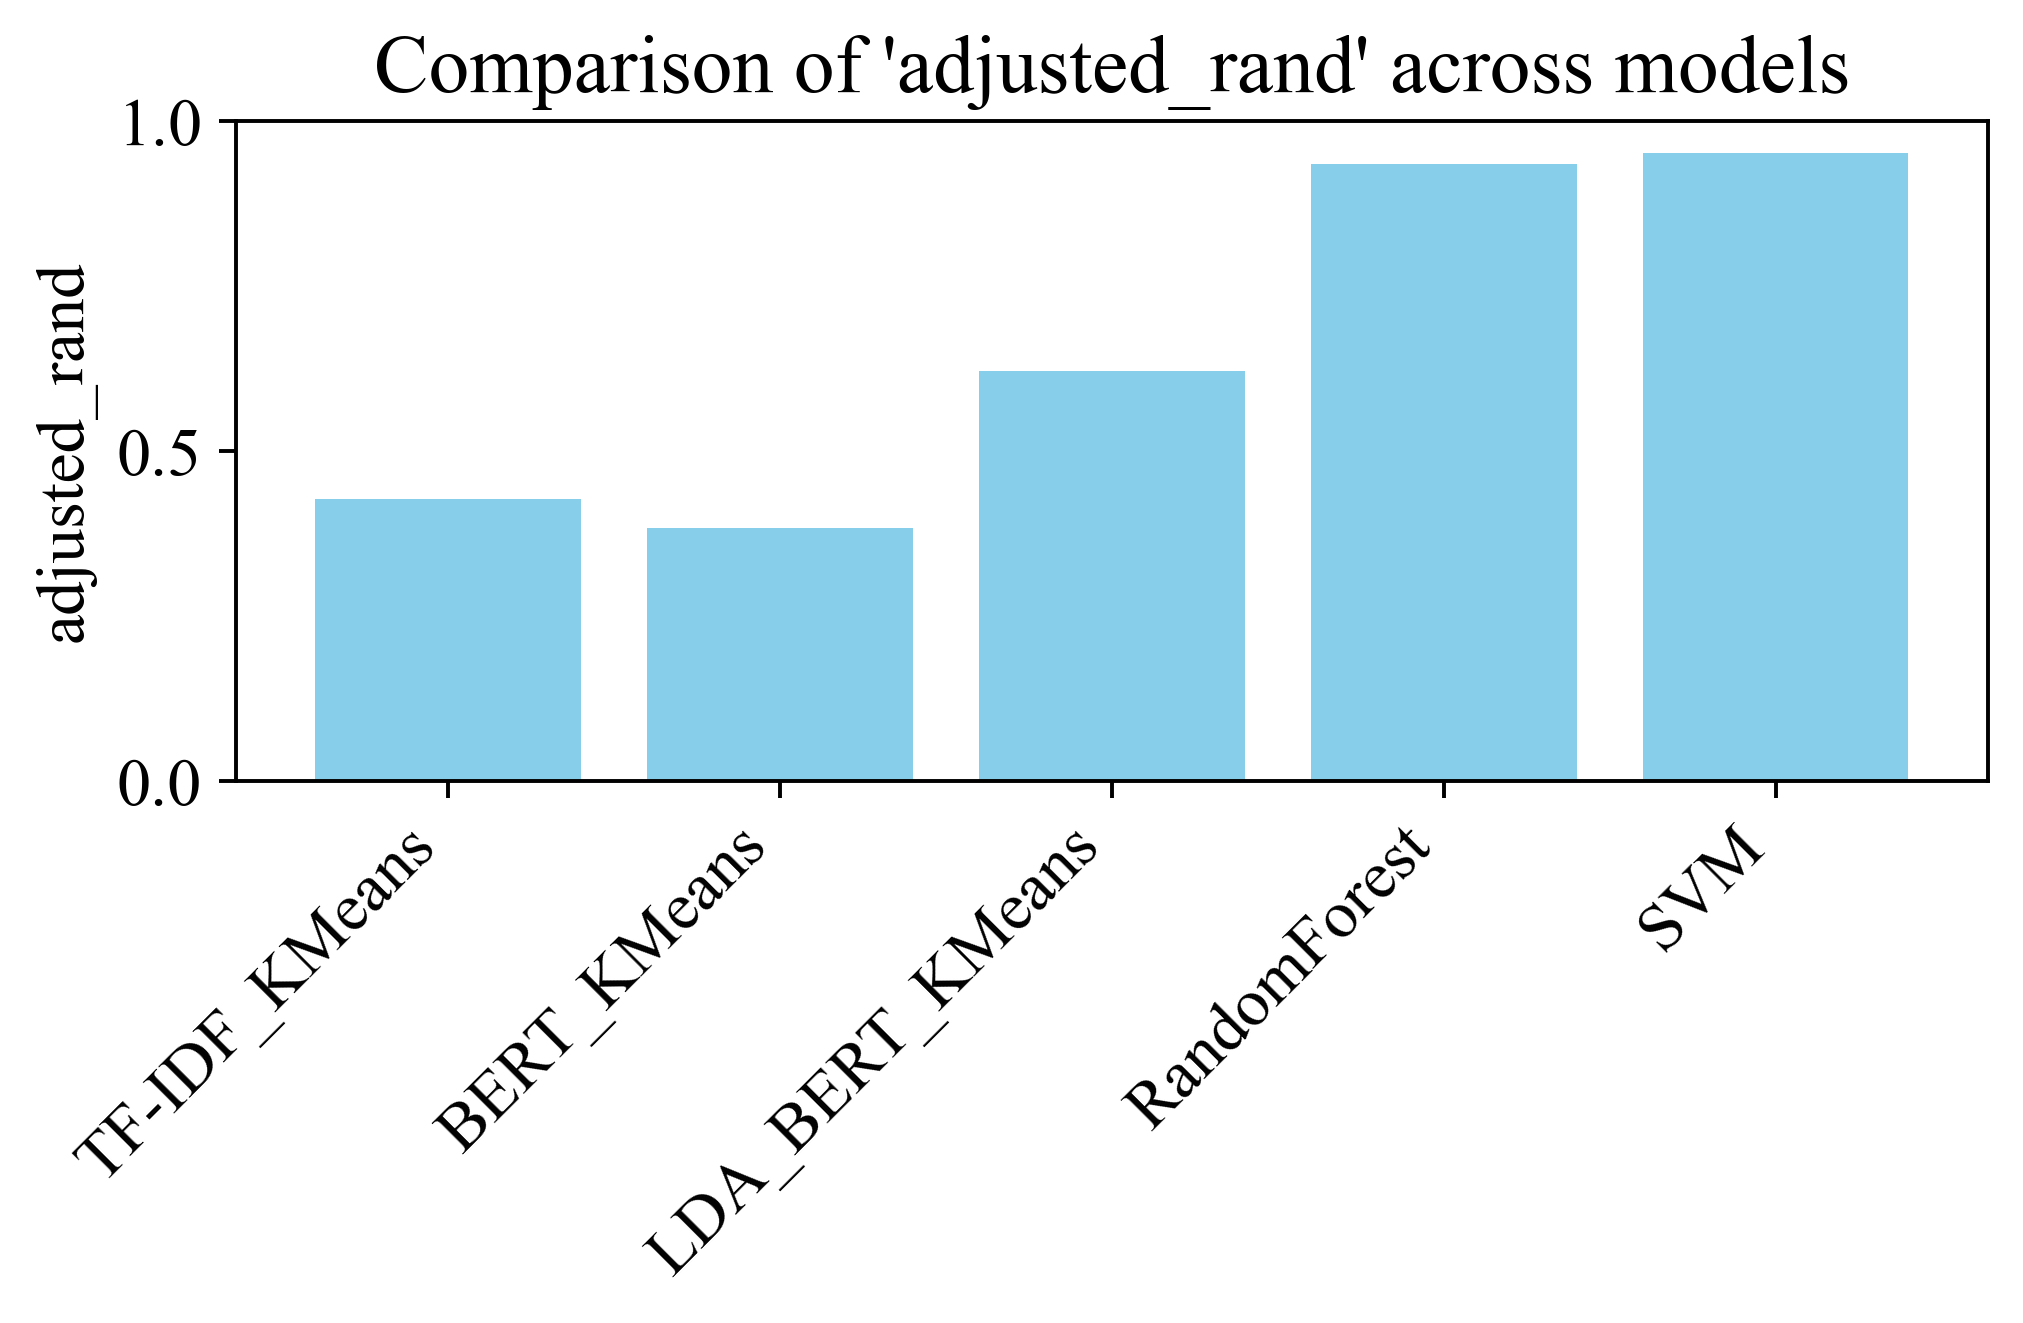

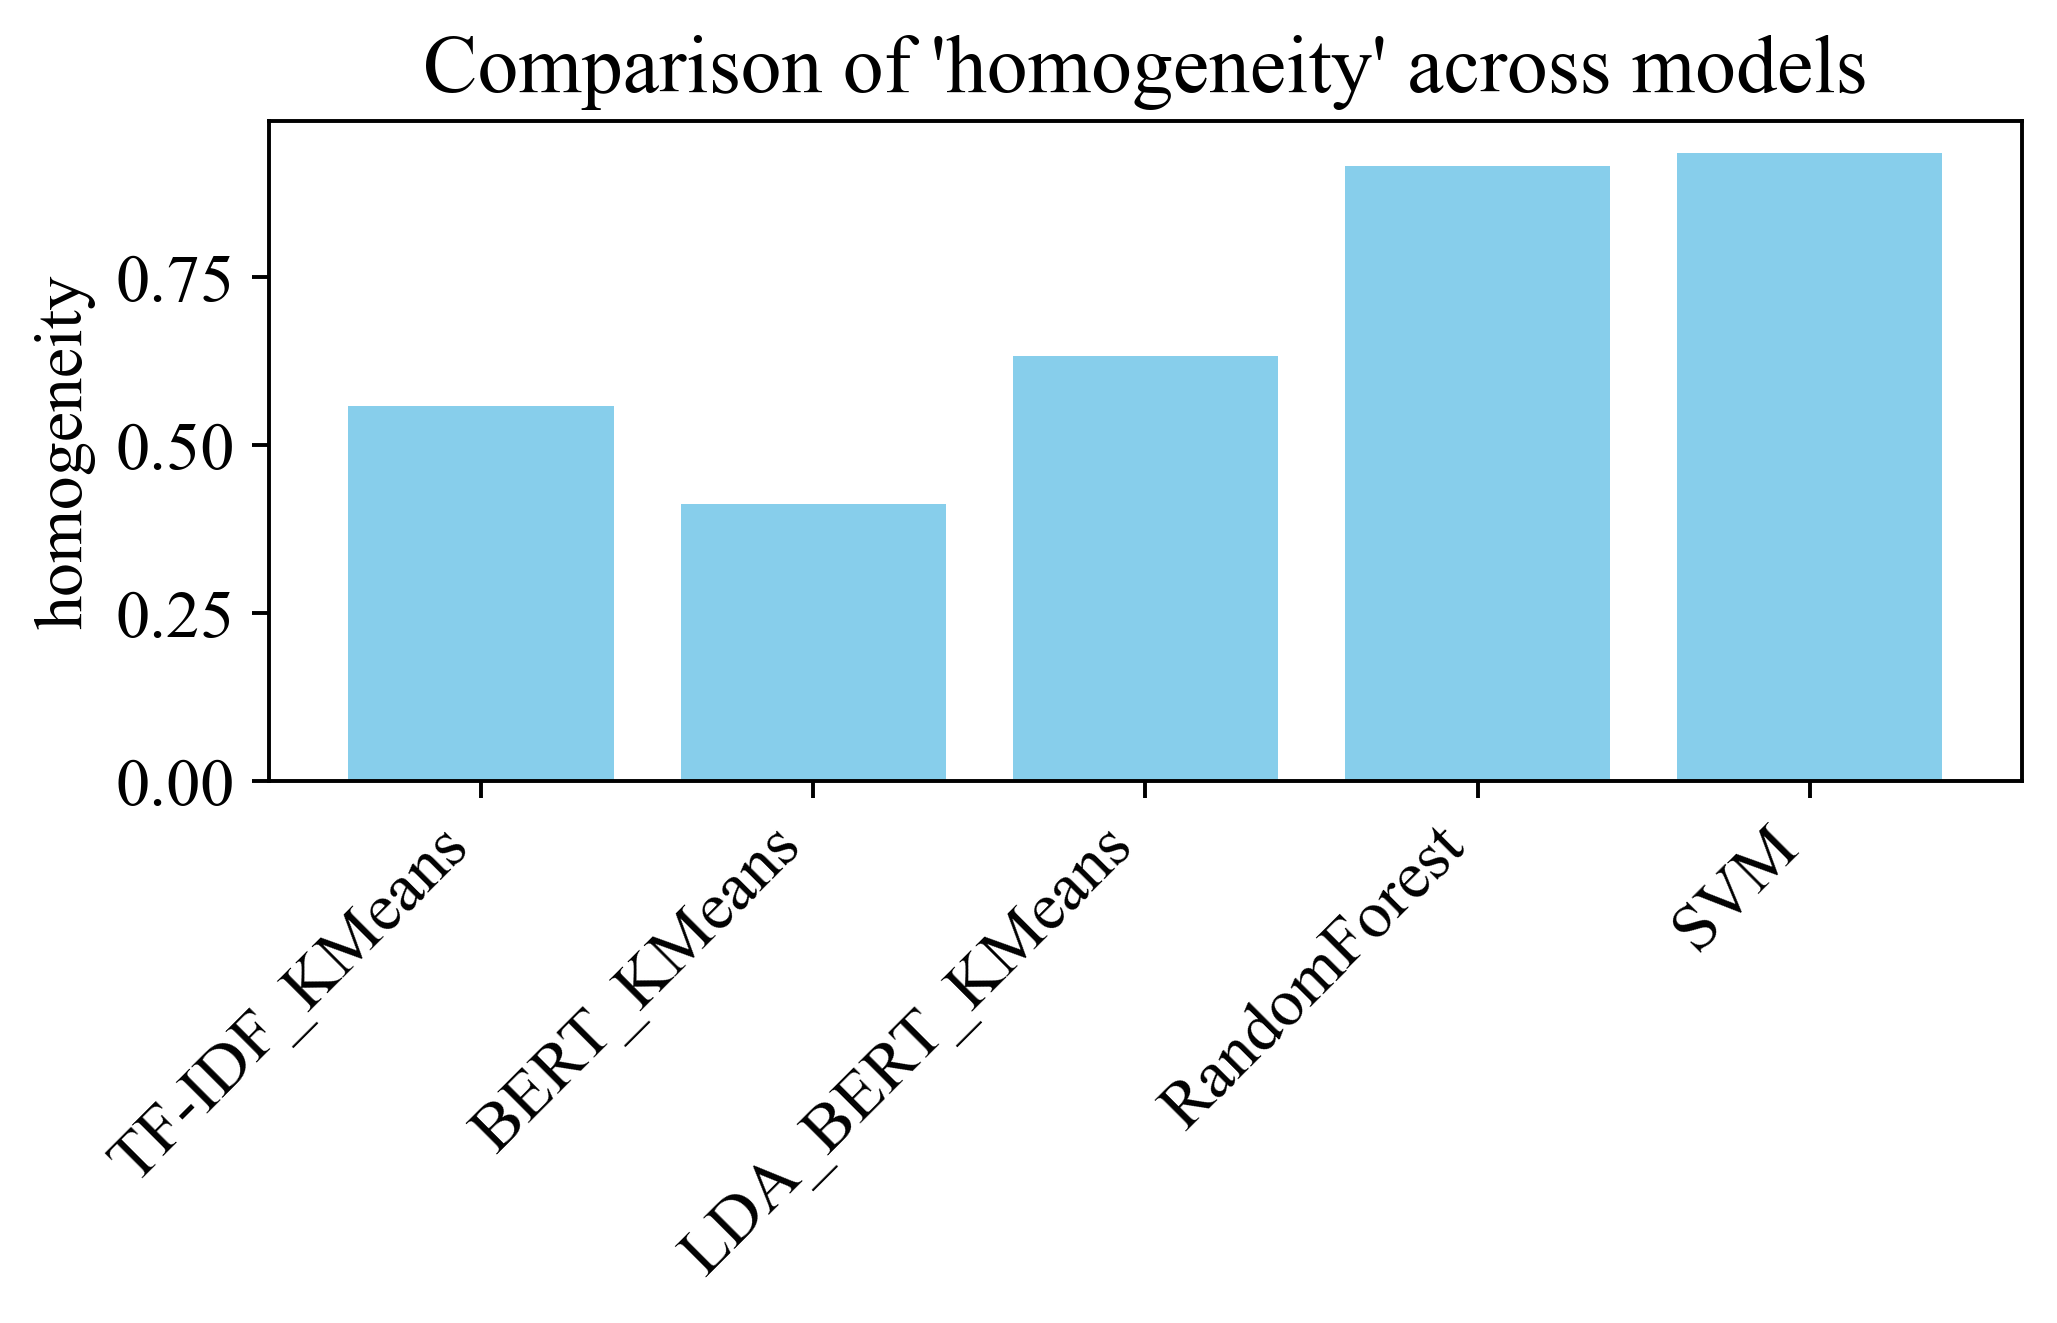

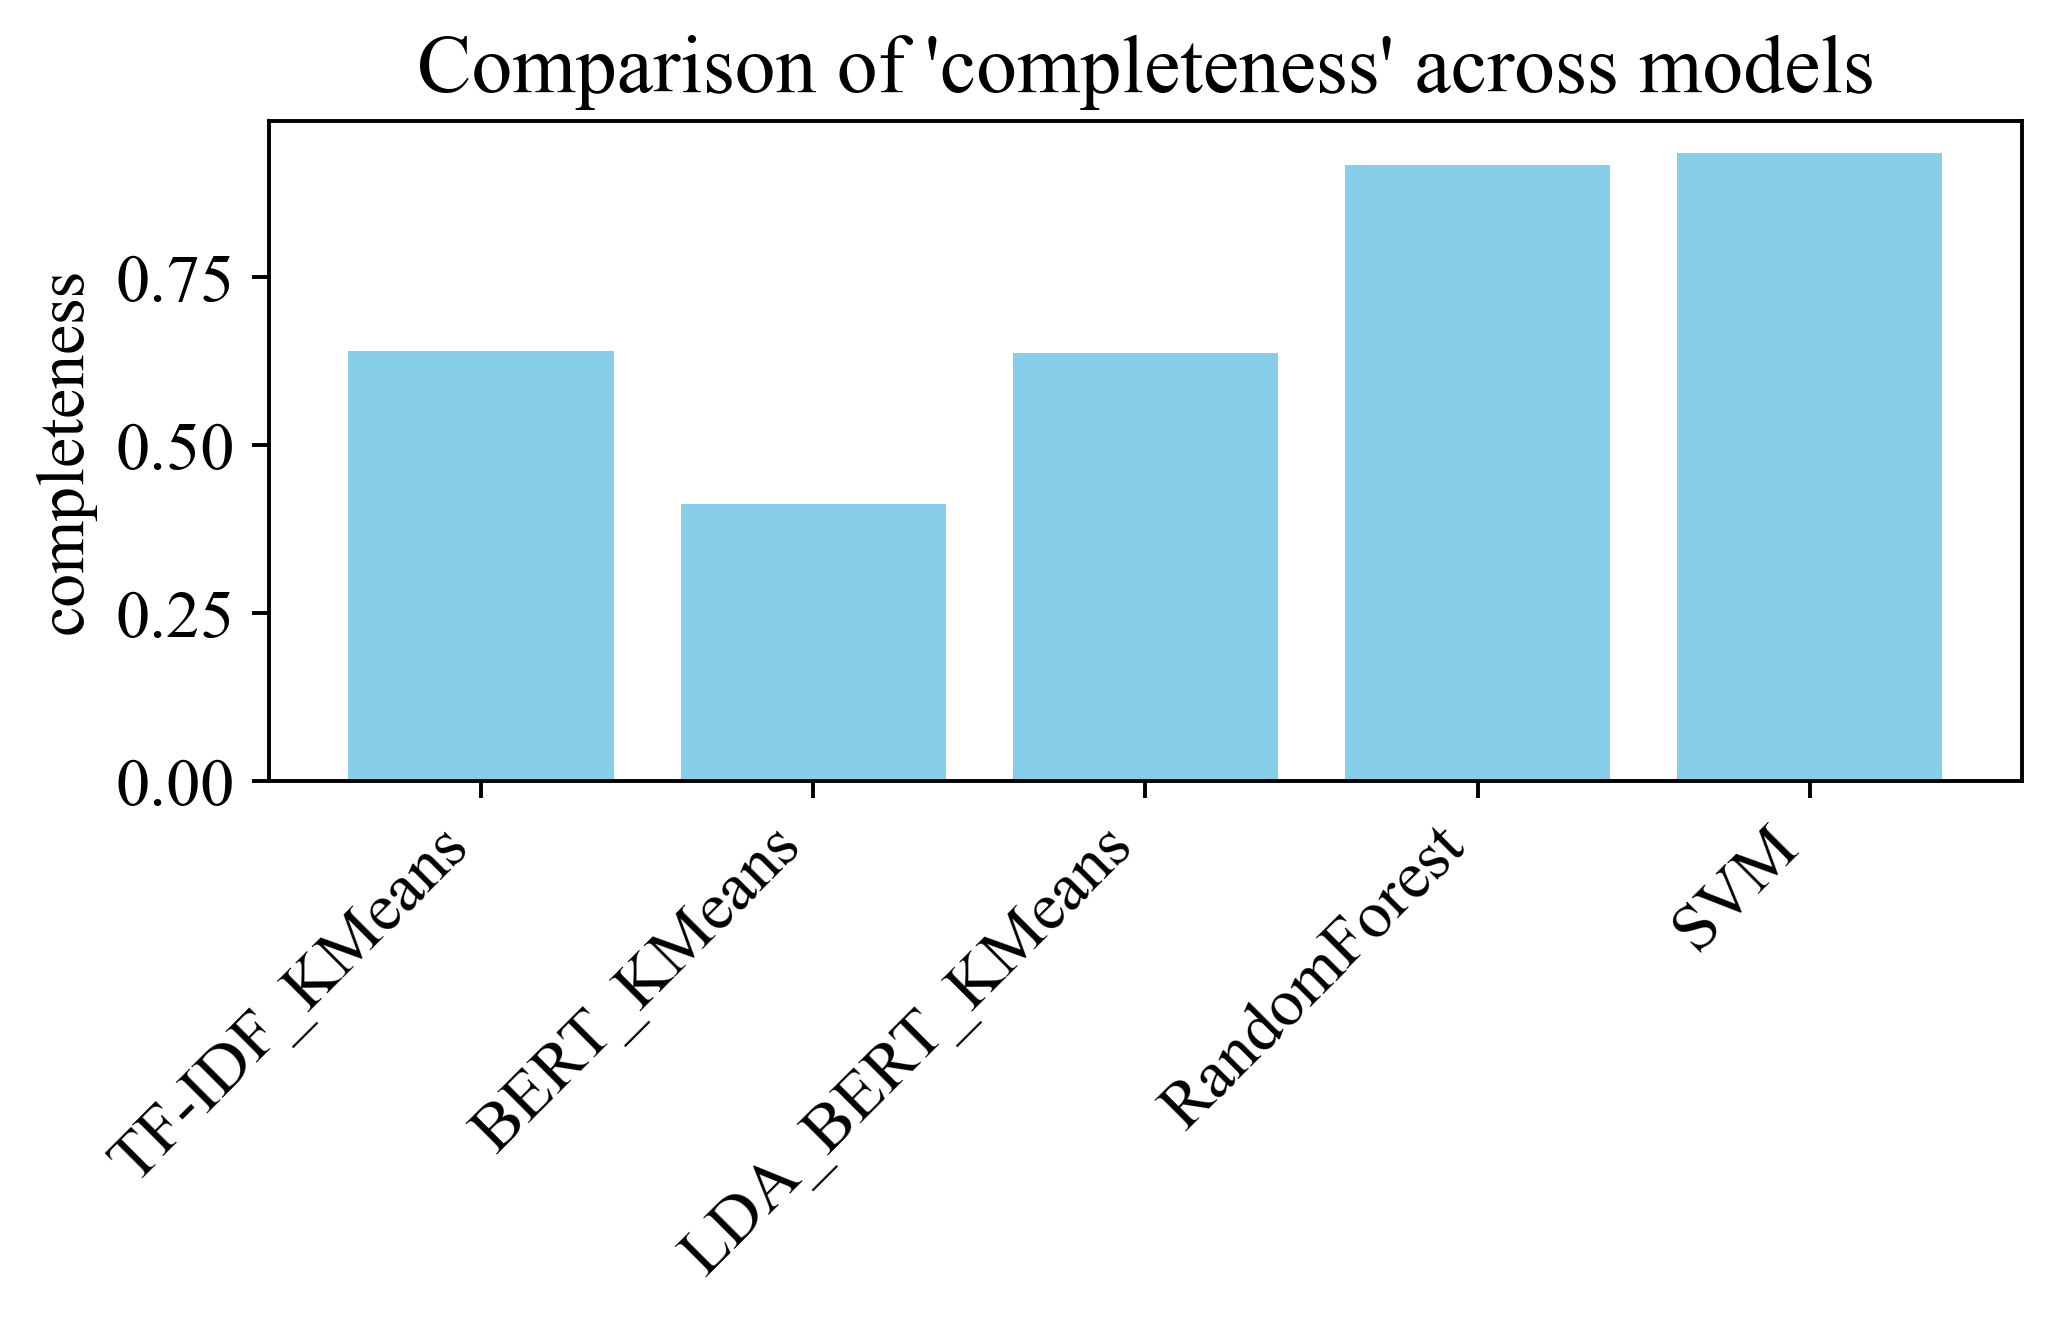

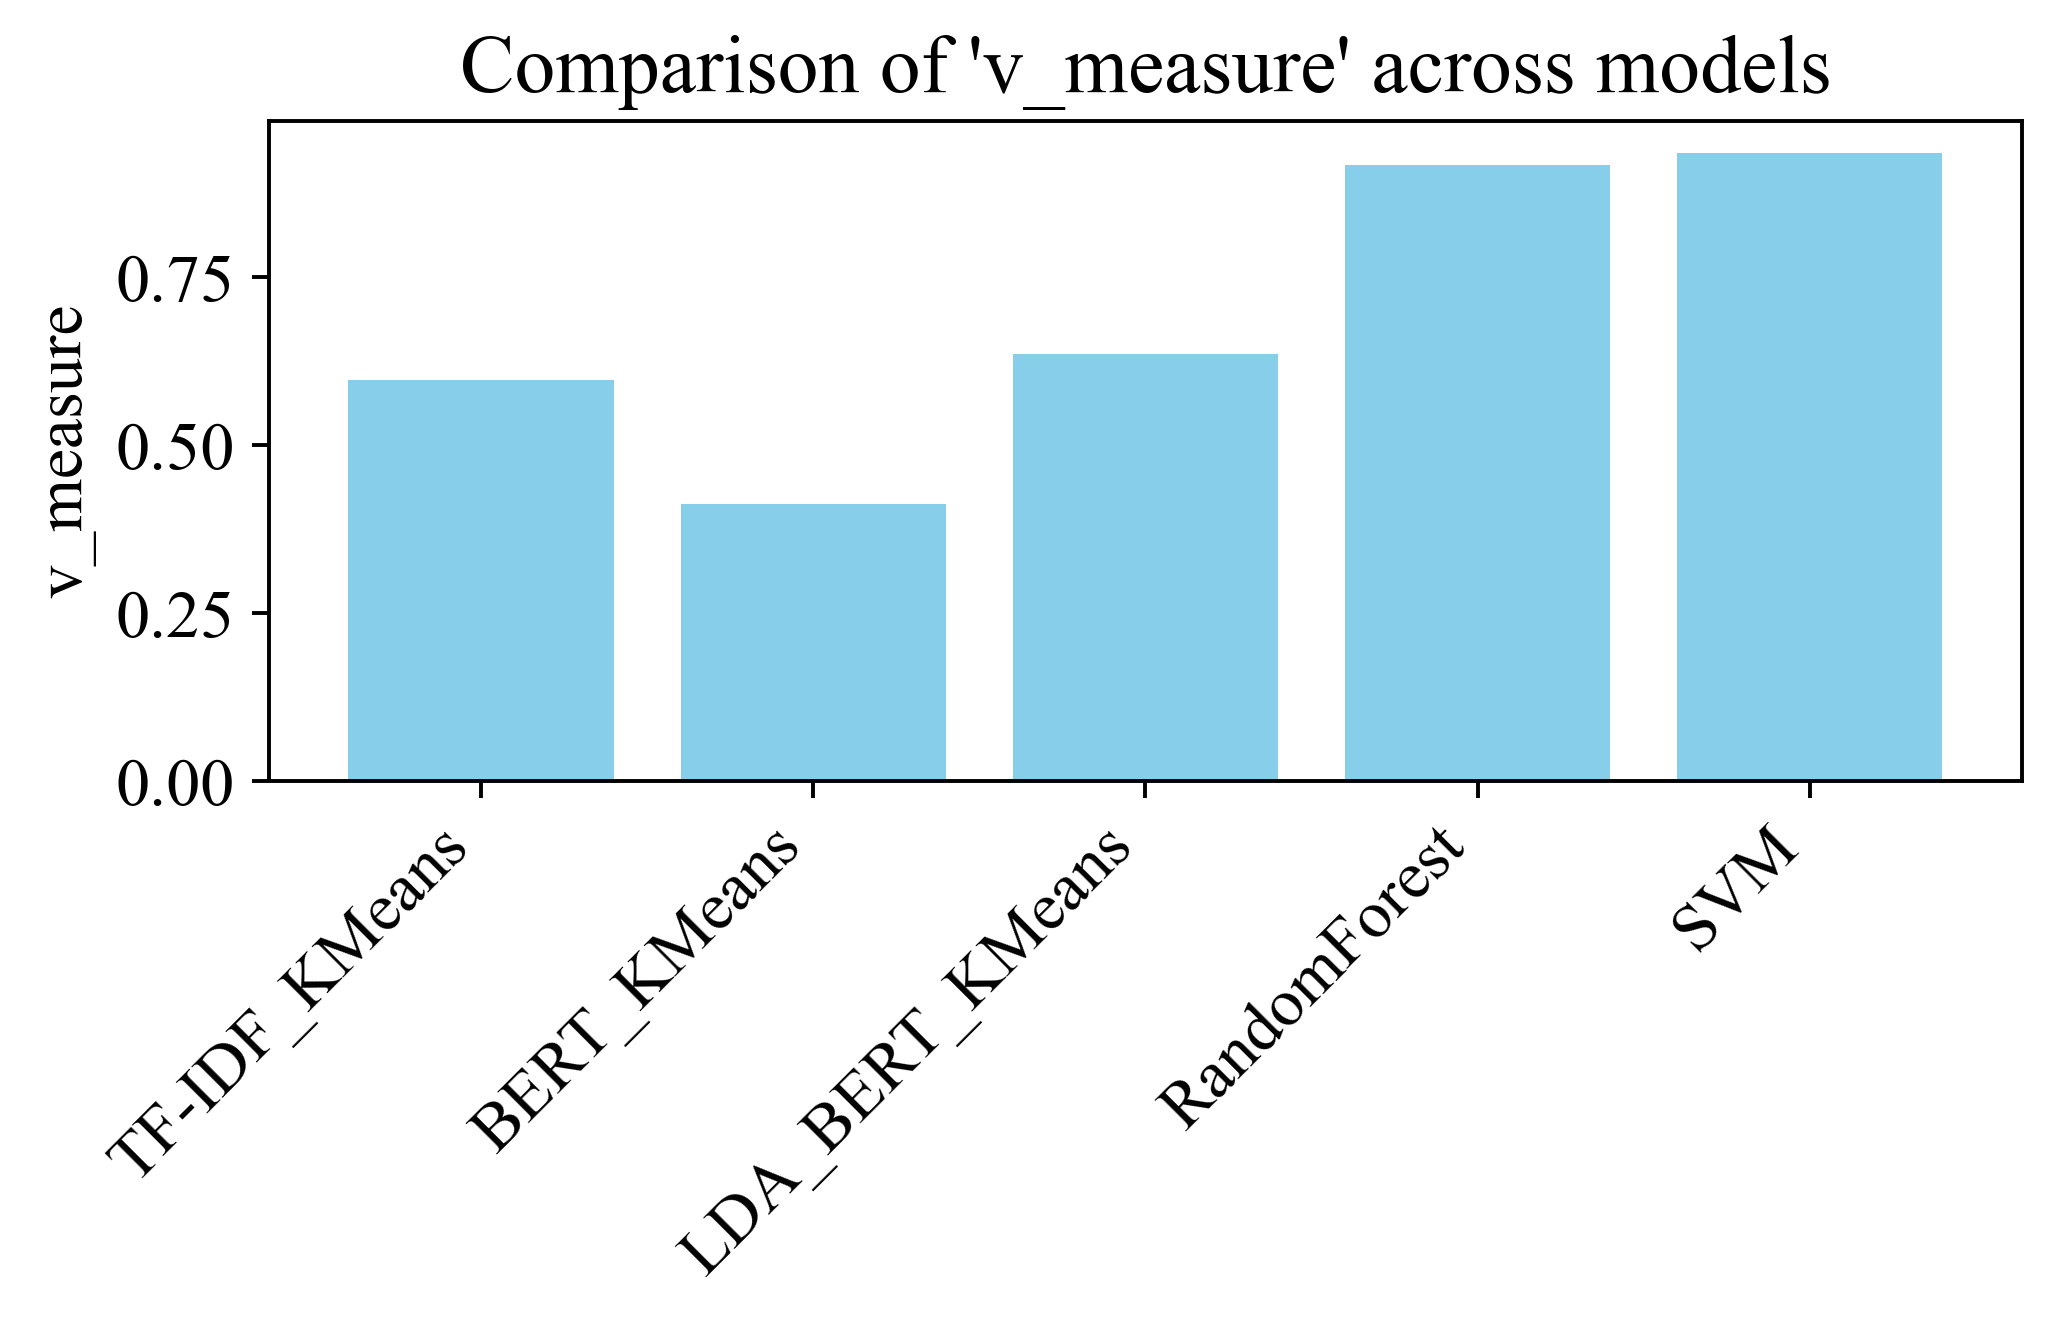

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Global font settings (if needed)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14

def plot_each_metric_separately(all_metrics, comparison_metrics):
    """
    Creates a separate bar chart for each metric in 'comparison_metrics'.
    Each chart displays the metric values for every model found in 'all_metrics'.
    """
    model_names = list(all_metrics.keys())

    for metric in comparison_metrics:
        fig, ax = plt.subplots(figsize=(6, 4), dpi=350)
        
        # Gather metric values for each model (fill missing with np.nan)
        values = [all_metrics[m].get(metric, np.nan) for m in model_names]

        x = np.arange(len(model_names))
        ax.bar(x, values, color='skyblue')

        ax.set_xticks(x)
        ax.set_xticklabels(model_names, rotation=45, ha='right')
        ax.set_ylabel(metric)
        ax.set_title(f"Comparison of '{metric}' across models")

        plt.tight_layout()
        plt.show()

plot_each_metric_separately(all_metrics, comparison_metrics)